# Time Series Forecasting fundamental with TensorFlow + Milestone Project 3: BitPredict

Let's write some Tensorflow Code to predict the price of Bitcoin based on historical price of Bitcoin.

## Get the data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we've download data from coindesk.com

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-04-08 03:26:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2023-04-08 03:26:02 (5.55 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



### Import timeseries with pandas

In [ ]:
import pandas as pd

# Load the data set
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000
mean,6529.845141,6513.579485,6710.061683,6302.417386
std,10887.847444,10863.800772,11206.779756,10475.811252
min,108.584830,108.584830,118.675000,83.328330
25%,460.087500,459.400500,469.720995,450.818830
50%,2780.182500,2772.367500,2874.696250,2696.457500
75%,8506.923720,8496.887593,8763.291985,8221.060570
max,63346.789035,63562.673545,64801.787870,62094.632914


In [ ]:
# How many samples we have ?
len(df)

2787

We've collected the historical price of Bitcoin for past ~8 years but there are 2787 samples.

Typically deep learning models like lots and lots of data (where lots and lots can be thousands to tens thousands to millions).

A samller number of samples is someting you'll often run into with time series data problems.

>**Note:** The **seasonality** of time series dataset is reffered as the number of samples per year. So for our bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year

In [ ]:
# Only wnat the closing price of each data?
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices.tail()

,Price
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


<Axes: xlabel='Date'>

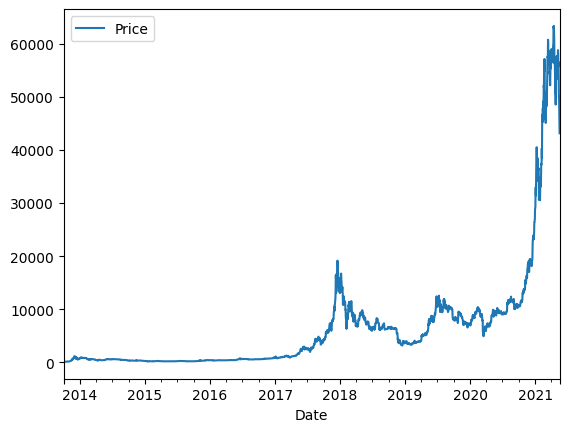

In [ ]:
bitcoin_prices.plot()

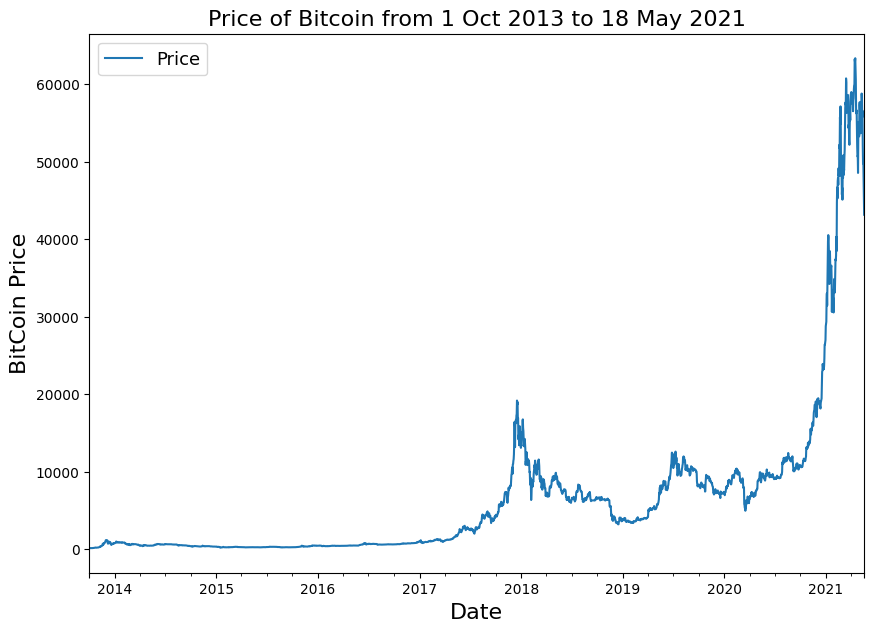

In [ ]:
# Plot the bitcoin prices using matplot lib
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 7))
# plt.plot(bitcoin_prices)

bitcoin_prices.plot(figsize=(10, 7))
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.ylabel("BitCoin Price", fontsize=16)
plt.legend(fontsize=13)

In [ ]:
# Reading the data with Python csv

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as fp:
  data = fp.read()
print([data[val:val+5] for val in range(0, len(data.split(',')), 5)] )

['Curre', 'ncy,D', 'ate,C', 'losin', 'g Pri', 'ce (U', 'SD),2', '4h Op', 'en (U', 'SD),2', '4h Hi', 'gh (U', 'SD),2', '4h Lo', 'w (US', 'D)\nBT', 'C,201', '3-10-', '01,12', '3.654', '99,12', '4.304', '66,12', '4.751', '66,12', '2.563', '49\nBT', 'C,201', '3-10-', '02,12', '5.455', ',123.', '65499', ',125.', '7585,', '123.6', '3383\n', 'BTC,2', '013-1', '0-03,', '108.5', '8483,', '125.4', '55,12', '5.665', '66,83', '.3283', '3\nBTC', ',2013', '-10-0', '4,118', '.6746', '6,108', '.5848', '3,118', '.675,', '107.0', '5816\n', 'BTC,2', '013-1', '0-05,', '121.3', '3866,', '118.6', '7466,', '121.9', '3633,', '118.0', '0566\n', 'BTC,2', '013-1', '0-06,', '120.6', '5533,', '121.3', '3866,', '121.8', '5216,', '120.5', '545\nB', 'TC,20', '13-10', '-07,1', '21.79', '5,120', '.6553', '3,121', '.9916', '6,120', '.4319', '9\nBTC', ',2013', '-10-0', '8,123', '.033,', '121.7', '95,12', '3.640', '16,12', '1.350', '66\nBT', 'C,201', '3-10-', '09,12', '4.049', ',123.', '033,1', '24.78', '35,12', '2.592', 

In [ ]:
values = []
# for val in data.split(','):
  # values.append([v for v in val.split('\n')])
print(data.split(','))
values

['Currency', 'Date', 'Closing Price (USD)', '24h Open (USD)', '24h High (USD)', '24h Low (USD)\nBTC', '2013-10-01', '123.65499', '124.30466', '124.75166', '122.56349\nBTC', '2013-10-02', '125.455', '123.65499', '125.7585', '123.63383\nBTC', '2013-10-03', '108.58483', '125.455', '125.66566', '83.32833\nBTC', '2013-10-04', '118.67466', '108.58483', '118.675', '107.05816\nBTC', '2013-10-05', '121.33866', '118.67466', '121.93633', '118.00566\nBTC', '2013-10-06', '120.65533', '121.33866', '121.85216', '120.5545\nBTC', '2013-10-07', '121.795', '120.65533', '121.99166', '120.43199\nBTC', '2013-10-08', '123.033', '121.795', '123.64016', '121.35066\nBTC', '2013-10-09', '124.049', '123.033', '124.7835', '122.59266\nBTC', '2013-10-10', '125.96116', '124.049', '128.01683', '123.81966\nBTC', '2013-10-11', '125.27966', '125.96116', '126.43666', '124.11383\nBTC', '2013-10-12', '125.9275', '125.27966', '126.0365', '123.12966\nBTC', '2013-10-13', '126.38333', '125.9275', '126.8965', '125.2765\nBTC', '2

[]

## Importing time series data with python CSV module

In [ ]:
import csv
from datetime import datetime

timesteps, btc_price = [], []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as fp:
  csv_reader = csv.reader(fp, delimiter=',')
  next(csv_reader) # Skip first line, get rid of the title column
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the date as date not string
    btc_price.append(float(line[2]))

# Let's view first 10 rows
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0, 0.5, 'Bitcoin Price')

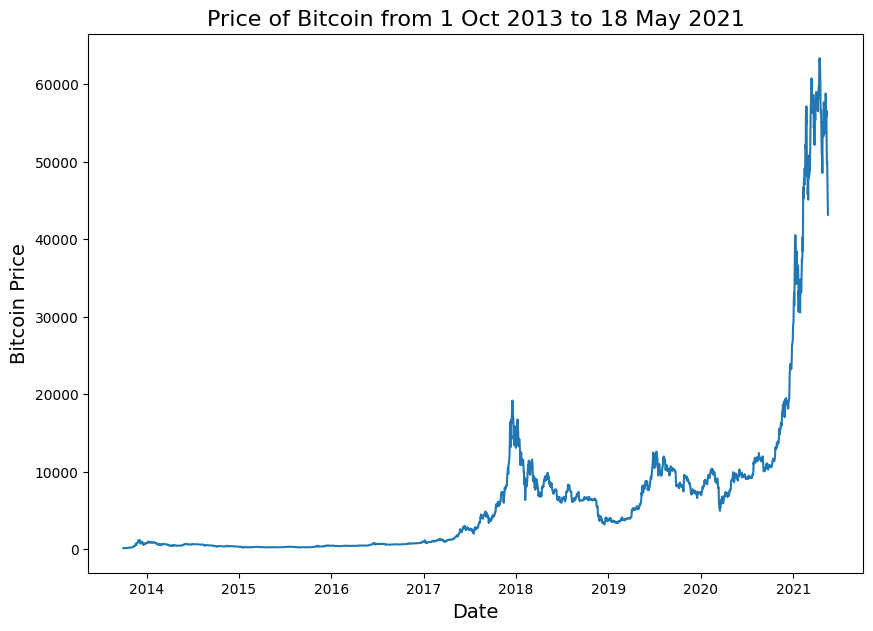

In [ ]:
# Plot the data from csv files

plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Bitcoin Price", fontsize=14)

## Format Data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [ ]:
# Get bitcoin data array

timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way of splttin
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=43)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

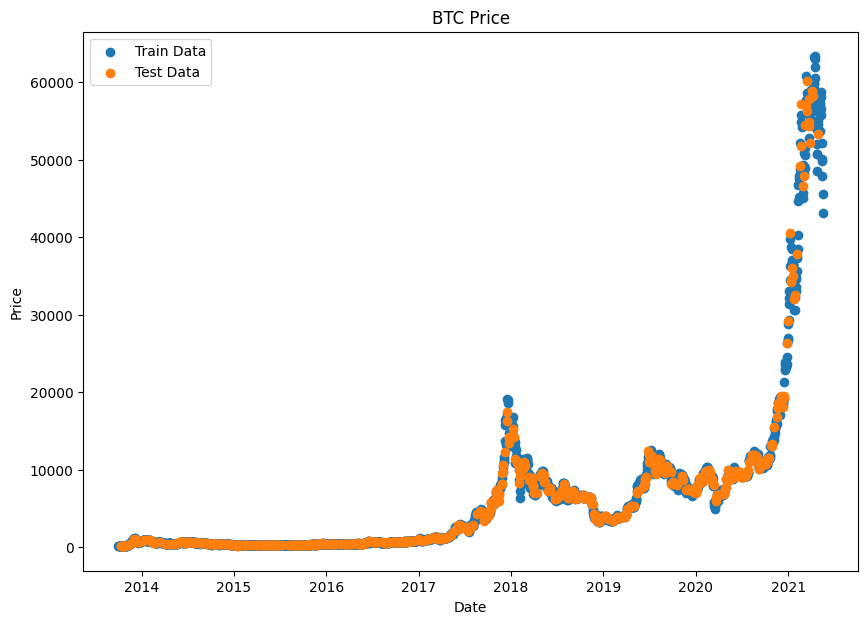

In [ ]:
# Plotting the wrong splitted data

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.title("BTC Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

### Create train and test set split for time series (the right way)

In [ ]:
# Splitting the train and test set data (the right way)

split_size = int(0.8 * len(prices)) # 80% train and 20% test data

# Create train and test split
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

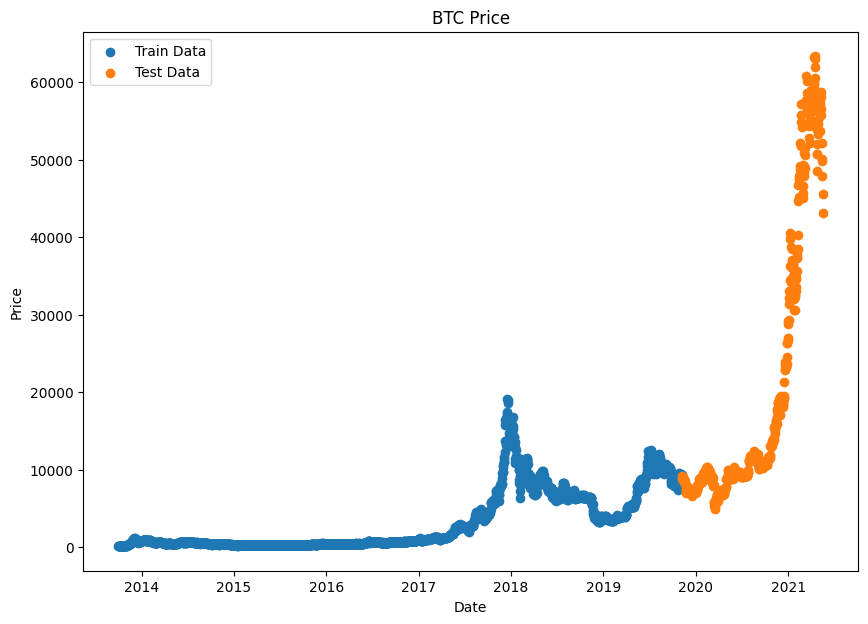

In [ ]:
# Plotting the wrong splitted data

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.title("BTC Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

### Create a plotting function

Typing plotting function is tedious, let's functionize it

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plot timesteps (a series of plots in time) against values (a series of values across time).

  Parameters:
    timesteps : array of timesteps values
    values : array of values across time
    format : style of plot, default='.'
    start : where to start the plot (setting a value will index from start of timesteps values), default=0
    end : where to end the plot (similar to start but for the end), default=None
    label : labels to show on plot, default=None

  Returns:
    None, just plot the data
  """

  # Plot the series

  plt.scatter(timesteps[start:end], values[start:end], label=label)
  plt.xlabel("Date")
  plt.ylabel("BitCoin Price")
  if label:
    plt.legend(fontsize=14) # Make font size 14
  plt.grid(True)

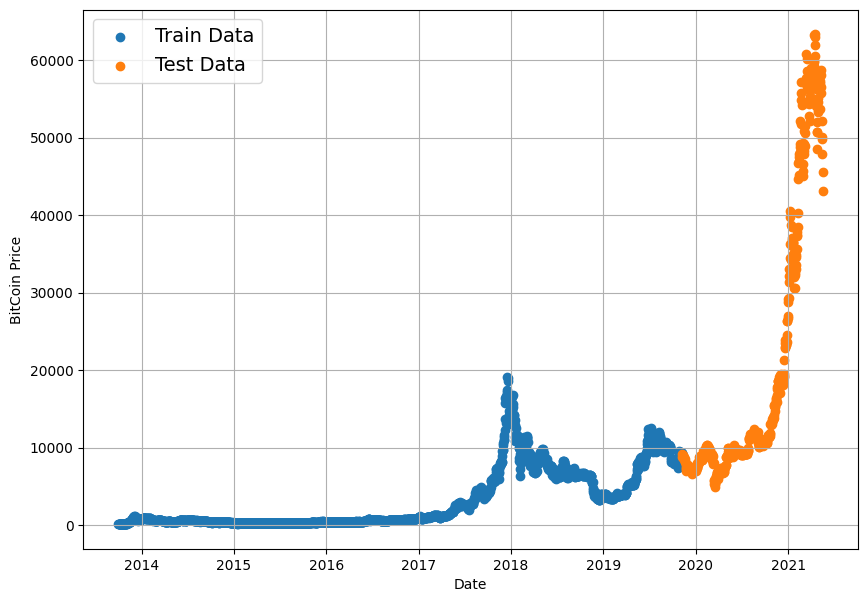

In [ ]:
# Test the plotting function
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, label="Train Data")
plot_time_series(X_test, y_test, label="Test Data")

## Modelling experiments

We've got some bitcoin historical data, to model it, let's run a series of experiments and see which model performs best.

Terms to be familiar with:
* **Horizon:** number of timesteps into the future we're going to predict
* **Window Size:** number of timesteps we're going to use to predict **horizon**

Modelling experiments we're running:
0. Naive model (baseline)
1. Dense model, horizon=1, window=7
2. Same as 1, horizon=1, window=30,
3. Same as 1, horizon=3, window=30
4. Conv1D
5. LSTM
6. Same as 1 (but with multivariate data)
7. N-BEATS Algorithm
8. Ensemble (multiple models optimized on different loss functions, horizon=1, window=7
9. Future prediction model (model to predict future values), horizon=1, window=7
10. Same as 1 (but with turkey data introduced), horizon=1, window=7

## Model 0: Naive Forcast Model (baseline)

The formula look like this:
$$ \hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timesteps t {y-hat} is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [ ]:
# Create a Naive Forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

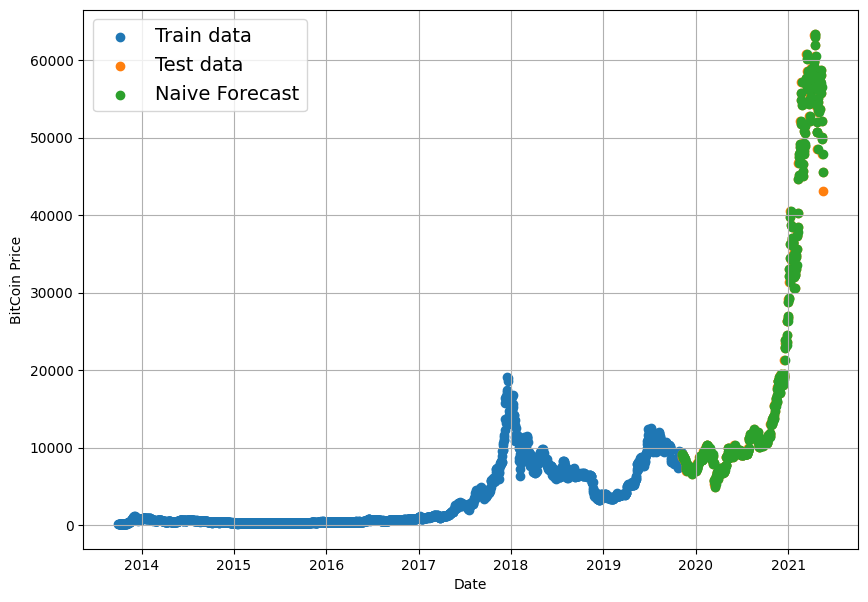

In [ ]:
# Plot the naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive Forecast")

# Evaluating a time series model

Let's look into some evaluation metrices for time series forecasting.

What we're doing ?

We're predicting a number, so that means we've a form of regression problem.

Because we're working with regression problem, we'll need some regression-like metrices.

A few common regression metrices (which can also be used in time series forecasting):
* MAE - Mean Absolute Error
* MSE - Mean Squared Error
* RMSE - Root Mean Squared Error
* MAPE/sMAPE - (symmetric) Mean Absolute Percentage Error
* MASE - Mean Absolute Scaled Error

For all the above metrices **the lower is better**, for example MAE of 1 is better than MAE of 100.

The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?**

In [ ]:
import tensorflow as tf

In [ ]:
# MASE - Implementation

def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality).
  """

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find mae of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day

  return mae/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
# Let's make a function that take the model prediction and truth values and give the evalutation metrics.
def evaluate_preds(y_true, y_pred):
  """
  Evaluate the predictions of a given model.

  Parameter:
    y_true : the truth labels
    y_pred : predicted labels

  Return:
    A dictionary of the different evalutation metrices.
  """

  # Make sure the y_true and y_pred are in float32
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics.
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Let's evaluate the results of naive forecast model
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

Here, the value of mae denotes that our predicted values can vary upto +- $567.98

The lower the values of the evaluation metrics the better the model performs.

## Format Data Part 2: Windowing our data

Why do we window?

We window our time series dataset to turn our dataset into a supervised learning problem.

```Windowing for one week:
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [ ]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [ ]:
# What we want to do with our bitcoin data?
print(f"We want to use: {btc_price[:7]}, to predict: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795], to predict: 123.033


In [ ]:
# Let's setup global variable for the horizon and window size
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon


In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
 """
 Creates labels for windowed dataset.
 E.g. if horizon=1 (default)
 Input: [0, 1, 2, 3, 4, 5, 6] -> Output: ([0, 1, 2, 3, 4, 5], [6])
 """
 return x[:, :-horizon], x[:, -horizon:]


In [ ]:
# Test out the wiindow labelling function
test_window, test_label = get_labelled_windows(x=tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window)} -> Label: {tf.squeeze(test_label)}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with python for loops, however, for large time series that'd be quite slow.

To speed things up, we'll leverage Numpy's array indexing.

Let's write a function which:

1. Creates a window step of specific window size, for example: [[0, 1, 2, 3, 4, 5, 6, 7]]
2. Uses NumPy indexing to create a 2D of multiple window steps, for example:

      [[0, 1, 2, 3, 4, 5, 6, 7],

      [1, 2, 3, 4, 5, 6, 7, 8],
      
      [2, 3, 4, 5, 6, 7, 8, 9]]

3. Uses the 2D array of multuple window steps to index on a target series
4. Uses the get_labelled_windows() function we created above to turn the window steps into windows
with a specified horizon

> Resource: The function created below has been adapted from Syafiq Kamarul Azman's
article Fast and Robust Sliding Window Vectorization with NumPy
(https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy3ad950ed62f5).



In [ ]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
 """
 Turns a 1D array into a 2D array of sequential windows of window_size.
 """

 # 1. Create a window of specific window_size (add the horizon on the end for later labelling later.
 window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
 # print(f"Window step:\n {window_step}")

 # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
 window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
 # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape)

 # 3. Index on the target array (time series) with 2D array of multiple window steps
 windowed_array = x[window_indexes]

 # 4. Get the labelled windows
 windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
 return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
 print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
 print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [ ]:
# Creating window and horizon without using numpy

# price, label = [], []
# previous = 0
# for val in range(WINDOW_SIZE, len(btc_price) - WINDOW_SIZE, WINDOW_SIZE):
#   # print(val)
#   # print(btc_price[previous:val])
#   # print(btc_price[val])
#   price.append(btc_price[previous:val])
#   label.append(btc_price[val])
#   previous = val

# price[:5], label[:5]

In [ ]:
# Make train test split
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Split matching pairs of windows and labels into train and test set.

  Paramters:
    windows (list): window to be splited
    labels (list): labels to be splited
    split_size : Size of the test dataset, default=0.2

  Returns:
    (train_windows, test_windows, train_labels, test_labels)

  """

  split_size = int(len(windows) * (1 - test_split))

  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

## Make a model checkpoint callback

We're so close to building models. So so so close.

Because our model's performance will fluctuate from experiment to experiment, we'll want to make sure we're comparing apples to apples.


What I mean by this is in order for a fair comparison, we want to compare each model's best performance against each model's best performance.

For example, if model_1 performed incredibly well on epoch 55 but its performance fell off toward epoch 100, we want the version of the model from epoch 55 to compare to other models rather than the version of the
model from epoch 100.


In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, # only output a limited amount of te
                                            save_best_only=True) # save only the best model

## Model 1: Dense Model (window=7, horizon=1)

Time to build one of our models.

If you think we've been through a fair bit of preprocessing before getting here, you're right.

Often, preparing data for a model is one of the largest parts of any machine learning project.

And once you've got a good model in place, you'll probably notice far more improvements from manipulating the data (e.g. collecting more, improving the quality) than manipulating the model.

We're going to start by keeping it simple, model_1 will have:
* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs

Why these values?

I picked them out of experimentation.


In [ ]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(43)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=HORIZON, activation="linear")
], name="model_1_dense")

# Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit the model
history_model_1 = model_1.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
13/18 [====================>.........] - ETA: 0s - loss: 551.2906 - mae: 551.2906 - mse: 1113180.7500

18/18 [==============================] - 5s 134ms/step - loss: 465.9786 - mae: 465.9786 - mse: 882239.5625 - val_loss: 1304.3076 - val_mae: 1304.3076 - val_mse: 4176240.0000
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 183.0358 - mae: 183.0358 - mse: 149697.2656

18/18 [==============================] - 1s 85ms/step - loss: 182.8962 - mae: 182.8962 - mse: 149734.2656 - val_loss: 1062.3146 - val_mae: 1062.3146 - val_mse: 3011521.7500
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 159.0845 - mae: 159.0845 - mse: 128445.8828

18/18 [==============================] - 2s 88ms/step - loss: 157.3242 - mae: 157.3242 - mse: 125362.8906 - val_loss: 790.0117 - val_mae: 790.0118 - val_mse: 2108405.5000
Epoch 4/100
18/18 [==============================] - 0s 13ms/step - loss: 137.9238 - mae: 137.9238 - mse: 104681.4844 - val_loss: 814.2491 - val_mae: 814.2491 - val_mse: 2025399.2500
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 175.2311 - mae: 175.2311 - mse: 173075.8750

18/18 [==============================] - 1s 83ms/step - loss: 134.3840 - mae: 134.3840 - mse: 99320.6562 - val_loss: 730.4001 - val_mae: 730.4001 - val_mse: 1814390.0000
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 128.9347 - mae: 128.9347 - mse: 93888.2734 - val_loss: 788.8492 - val_mae: 788.8492 - val_mse: 1851642.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 105.0048 - mae: 105.0048 - mse: 48524.3242

18/18 [==============================] - 1s 82ms/step - loss: 124.6109 - mae: 124.6109 - mse: 87531.5547 - val_loss: 678.0942 - val_mae: 678.0942 - val_mse: 1579529.5000
Epoch 8/100
13/18 [====================>.........] - ETA: 0s - loss: 119.0951 - mae: 119.0951 - mse: 80612.4609 

18/18 [==============================] - 1s 82ms/step - loss: 120.1032 - mae: 120.1032 - mse: 82897.5781 - val_loss: 659.2425 - val_mae: 659.2425 - val_mse: 1469762.1250
Epoch 9/100
12/18 [===================>..........] - ETA: 0s - loss: 116.4639 - mae: 116.4639 - mse: 76429.9141

18/18 [==============================] - 2s 126ms/step - loss: 118.9047 - mae: 118.9047 - mse: 81469.1016 - val_loss: 643.6900 - val_mae: 643.6900 - val_mse: 1440147.3750
Epoch 10/100
 9/18 [==============>...............] - ETA: 0s - loss: 122.6745 - mae: 122.6745 - mse: 89079.8359 

18/18 [==============================] - 2s 129ms/step - loss: 118.4628 - mae: 118.4628 - mse: 81075.1250 - val_loss: 641.9772 - val_mae: 641.9772 - val_mse: 1430602.3750
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 117.1494 - mae: 117.1494 - mse: 78944.7500

18/18 [==============================] - 2s 102ms/step - loss: 117.1494 - mae: 117.1494 - mse: 78944.7500 - val_loss: 619.5444 - val_mae: 619.5444 - val_mse: 1342863.1250
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 103.3978 - mae: 103.3978 - mse: 56924.0664

18/18 [==============================] - 1s 59ms/step - loss: 115.3152 - mae: 115.3152 - mse: 77754.8125 - val_loss: 615.4072 - val_mae: 615.4072 - val_mse: 1332216.8750
Epoch 13/100
15/18 [========================>.....] - ETA: 0s - loss: 111.5345 - mae: 111.5345 - mse: 75728.6172 

18/18 [==============================] - 2s 118ms/step - loss: 112.8377 - mae: 112.8377 - mse: 75846.6484 - val_loss: 606.6258 - val_mae: 606.6258 - val_mse: 1298030.8750
Epoch 14/100
14/18 [======================>.......] - ETA: 0s - loss: 111.5546 - mae: 111.5546 - mse: 77905.7422 

18/18 [==============================] - 2s 103ms/step - loss: 112.6740 - mae: 112.6740 - mse: 75672.9531 - val_loss: 601.3107 - val_mae: 601.3107 - val_mse: 1281102.1250
Epoch 15/100
18/18 [==============================] - 0s 9ms/step - loss: 112.5220 - mae: 112.5220 - mse: 74308.1094 - val_loss: 697.0883 - val_mae: 697.0883 - val_mse: 1489766.2500
Epoch 16/100
18/18 [==============================] - 0s 13ms/step - loss: 124.5907 - mae: 124.5907 - mse: 79627.0391 - val_loss: 668.0155 - val_mae: 668.0155 - val_mse: 1411758.0000
Epoch 17/100
18/18 [==============================] - 0s 9ms/step - loss: 117.2121 - mae: 117.2121 - mse: 78591.4062 - val_loss: 636.0487 - val_mae: 636.0487 - val_mse: 1364982.5000
Epoch 18/100
18/18 [==============================] - 0s 8ms/step - loss: 112.6241 - mae: 112.6241 - mse: 74334.1562 - val_loss: 651.4835 - val_mae: 651.4835 - val_mse: 1362427.7500
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 113.7878 - mae: 113.7878 -

18/18 [==============================] - 1s 72ms/step - loss: 111.1290 - mae: 111.1290 - mse: 73128.7656 - val_loss: 580.4536 - val_mae: 580.4536 - val_mse: 1217013.1250
Epoch 23/100
15/18 [========================>.....] - ETA: 0s - loss: 113.3137 - mae: 113.3137 - mse: 76359.0859

18/18 [==============================] - 2s 99ms/step - loss: 113.3072 - mae: 113.3072 - mse: 75551.8203 - val_loss: 577.6055 - val_mae: 577.6055 - val_mse: 1203212.3750
Epoch 24/100
18/18 [==============================] - 0s 20ms/step - loss: 110.9817 - mae: 110.9817 - mse: 73397.7734 - val_loss: 591.2591 - val_mae: 591.2591 - val_mse: 1237420.3750
Epoch 25/100
18/18 [==============================] - 0s 18ms/step - loss: 115.3248 - mae: 115.3248 - mse: 74621.0312 - val_loss: 780.8585 - val_mae: 780.8585 - val_mse: 1718179.5000
Epoch 26/100
18/18 [==============================] - 0s 22ms/step - loss: 119.9426 - mae: 119.9426 - mse: 76271.7500 - val_loss: 639.8391 - val_mae: 639.8391 - val_mse: 1325804.8750
Epoch 27/100
18/18 [==============================] - 0s 14ms/step - loss: 112.2937 - mae: 112.2937 - mse: 73512.2031 - val_loss: 605.7219 - val_mae: 605.7219 - val_mse: 1248305.3750
Epoch 28/100
16/18 [=========================>....] - ETA: 0s - loss: 106.2481 - mae: 106.2481 - m

18/18 [==============================] - 2s 107ms/step - loss: 108.5533 - mae: 108.5533 - mse: 71632.5078 - val_loss: 575.8409 - val_mae: 575.8409 - val_mse: 1198657.6250
Epoch 29/100
14/18 [======================>.......] - ETA: 0s - loss: 113.2311 - mae: 113.2311 - mse: 77209.0000

18/18 [==============================] - 1s 88ms/step - loss: 111.7773 - mae: 111.7773 - mse: 73450.2500 - val_loss: 575.4333 - val_mae: 575.4333 - val_mse: 1196950.5000
Epoch 30/100
18/18 [==============================] - 0s 17ms/step - loss: 107.5239 - mae: 107.5239 - mse: 70451.4297 - val_loss: 581.8052 - val_mae: 581.8052 - val_mse: 1199494.6250
Epoch 31/100
18/18 [==============================] - 0s 13ms/step - loss: 107.8423 - mae: 107.8423 - mse: 70325.1172 - val_loss: 608.5355 - val_mae: 608.5355 - val_mse: 1251659.1250
Epoch 32/100
18/18 [==============================] - 0s 18ms/step - loss: 113.5769 - mae: 113.5769 - mse: 73527.8438 - val_loss: 667.7151 - val_mae: 667.7151 - val_mse: 1418586.2500
Epoch 33/100
17/18 [===========================>..] - ETA: 0s - loss: 114.0771 - mae: 114.0771 - mse: 73132.3359

18/18 [==============================] - 1s 68ms/step - loss: 113.8762 - mae: 113.8762 - mse: 72584.7656 - val_loss: 573.2422 - val_mae: 573.2422 - val_mse: 1183206.5000
Epoch 34/100
14/18 [======================>.......] - ETA: 0s - loss: 106.8519 - mae: 106.8519 - mse: 68076.5547

18/18 [==============================] - 1s 61ms/step - loss: 107.1898 - mae: 107.1898 - mse: 70943.6641 - val_loss: 572.9836 - val_mae: 572.9836 - val_mse: 1187076.7500
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 107.6896 - mae: 107.6896 - mse: 71449.2500 - val_loss: 784.5164 - val_mae: 784.5164 - val_mse: 1721317.6250
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6852 - mae: 114.6852 - mse: 72980.7109 - val_loss: 586.2700 - val_mae: 586.2700 - val_mse: 1217098.6250
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 130.0752 - mae: 130.0752 - mse: 103780.9844

18/18 [==============================] - 1s 37ms/step - loss: 108.6291 - mae: 108.6291 - mse: 69788.8516 - val_loss: 572.7030 - val_mae: 572.7030 - val_mse: 1178531.1250
Epoch 38/100
18/18 [==============================] - 0s 4ms/step - loss: 106.8336 - mae: 106.8336 - mse: 70136.9688 - val_loss: 586.0283 - val_mae: 586.0283 - val_mse: 1215503.8750
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 83.8228 - mae: 83.8228 - mse: 44751.8906

18/18 [==============================] - 1s 37ms/step - loss: 107.6973 - mae: 107.6973 - mse: 70238.0078 - val_loss: 569.6332 - val_mae: 569.6332 - val_mse: 1175742.1250
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 105.7452 - mae: 105.7452 - mse: 69050.2188 - val_loss: 619.4788 - val_mae: 619.4788 - val_mse: 1289914.3750
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6300 - mae: 110.6300 - mse: 71257.1172 - val_loss: 646.1328 - val_mae: 646.1328 - val_mse: 1327488.8750
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0495 - mae: 111.0495 - mse: 72061.3828 - val_loss: 595.0078 - val_mae: 595.0078 - val_mse: 1234277.7500
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0988 - mae: 108.0988 - mse: 70288.2969 - val_loss: 689.4661 - val_mae: 689.4661 - val_mse: 1470089.2500
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 109.0365 - mae: 109.0365 - m

18/18 [==============================] - 1s 37ms/step - loss: 108.2402 - mae: 108.2402 - mse: 70011.2969 - val_loss: 568.9347 - val_mae: 568.9347 - val_mse: 1171972.8750
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1029 - mae: 109.1029 - mse: 70380.2969 - val_loss: 579.9208 - val_mae: 579.9208 - val_mse: 1185653.0000
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 108.9232 - mae: 108.9232 - mse: 70950.6562 - val_loss: 578.9159 - val_mae: 578.9159 - val_mse: 1198003.1250
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2299 - mae: 111.2299 - mse: 72139.8594 - val_loss: 605.7227 - val_mae: 605.7227 - val_mse: 1253626.0000
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0630 - mae: 106.0630 - mse: 69137.4062 - val_loss: 569.8531 - val_mae: 569.8531 - val_mse: 1166705.5000
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 114.9268 - mae: 114.9268 - m

18/18 [==============================] - 1s 43ms/step - loss: 113.9351 - mae: 113.9351 - mse: 72330.0156 - val_loss: 568.6290 - val_mae: 568.6290 - val_mse: 1170350.2500
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 109.1834 - mae: 109.1834 - mse: 69404.4922 - val_loss: 620.5678 - val_mae: 620.5678 - val_mse: 1287346.2500
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 109.4061 - mae: 109.4061 - mse: 69319.7422 - val_loss: 586.5206 - val_mae: 586.5206 - val_mse: 1194678.0000
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 111.5642 - mae: 111.5642 - mse: 71026.2344 - val_loss: 577.1270 - val_mae: 577.1270 - val_mse: 1192800.0000
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 112.6892 - mae: 112.6892 - mse: 72463.7891 - val_loss: 654.7567 - val_mae: 654.7567 - val_mse: 1374426.7500
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 112.5328 - mae: 112.5328 - m

18/18 [==============================] - 1s 47ms/step - loss: 104.7780 - mae: 104.7780 - mse: 68369.5781 - val_loss: 566.9155 - val_mae: 566.9155 - val_mse: 1162489.2500
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 105.6693 - mae: 105.6693 - mse: 69119.5312 - val_loss: 679.9569 - val_mae: 679.9569 - val_mse: 1434598.0000
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1186 - mae: 109.1186 - mse: 71799.3203 - val_loss: 735.1397 - val_mae: 735.1397 - val_mse: 1556911.3750
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 115.2119 - mae: 115.2119 - mse: 71664.7500 - val_loss: 567.3580 - val_mae: 567.3580 - val_mse: 1160571.3750
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 113.7020 - mae: 113.7020 - mse: 73780.6641 - val_loss: 650.8164 - val_mae: 650.8164 - val_mse: 1365883.7500
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8199 - mae: 109.8199 - m

18/18 [==============================] - 1s 38ms/step - loss: 109.0643 - mae: 109.0643 - mse: 70156.5938 - val_loss: 566.5042 - val_mae: 566.5042 - val_mse: 1158366.0000
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2078 - mae: 108.2078 - mse: 70125.9531 - val_loss: 606.4001 - val_mae: 606.4001 - val_mse: 1253269.1250
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 106.5726 - mae: 106.5726 - mse: 70278.9922 - val_loss: 569.3167 - val_mae: 569.3167 - val_mse: 1160351.2500
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 106.2359 - mae: 106.2359 - mse: 67797.4922 - val_loss: 584.8351 - val_mae: 584.8351 - val_mse: 1183683.3750
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 105.5496 - mae: 105.5496 - mse: 69074.9531 - val_loss: 566.6426 - val_mae: 566.6426 - val_mse: 1157222.5000
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 106.3144 - mae: 106.3144 - m

In [ ]:
# Evaluate the model
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.5726 - mae: 568.5726 - mse: 1163281.2500


[568.5725708007812, 568.5725708007812, 1163281.25]

In [ ]:
# Load in the saved best performing model_1 and evalute it on the test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 566.5042 - mae: 566.5042 - mse: 1158366.1250


[566.5042114257812, 566.5042114257812, 1158366.125]

## Making forcast on the model_1 on the test windows

We've trained a model and evaluated the it on the test data, but the project we're working on is called BitPredict
💰📈 so how do you think we could use our model to make predictions?

Since we're going to be running more modelling experiments, let's write a function which:
1. Takes in a trained model (just like model_1 )
2. Takes in some input data (just like the data the model was trained on)
3. Passes the input data to the model's predict() method
4. Returns the predictions

In [ ]:
def make_preds(model, input_data):
  """
  Use the model to make prediction on the input data
  """
  return tf.squeeze(model.predict(input_data)) # return 1D array of the predictions

In [ ]:
model_1_preds = make_preds(model=model_1, input_data=test_windows)
model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8845.044 , 8788.361 , 9064.415 , 8758.474 , 8737.8545, 8765.409 ,
       8683.653 , 8511.241 , 8472.528 , 8540.798 ], dtype=float32)>

In [ ]:
# Evaluate the results of the model_1

model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 566.50433,
 'mse': 1158366.1,
 'rmse': 1076.2742,
 'mape': 2.5341477,
 'mase': 0.9951912}

In [ ]:
# Baseline results
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

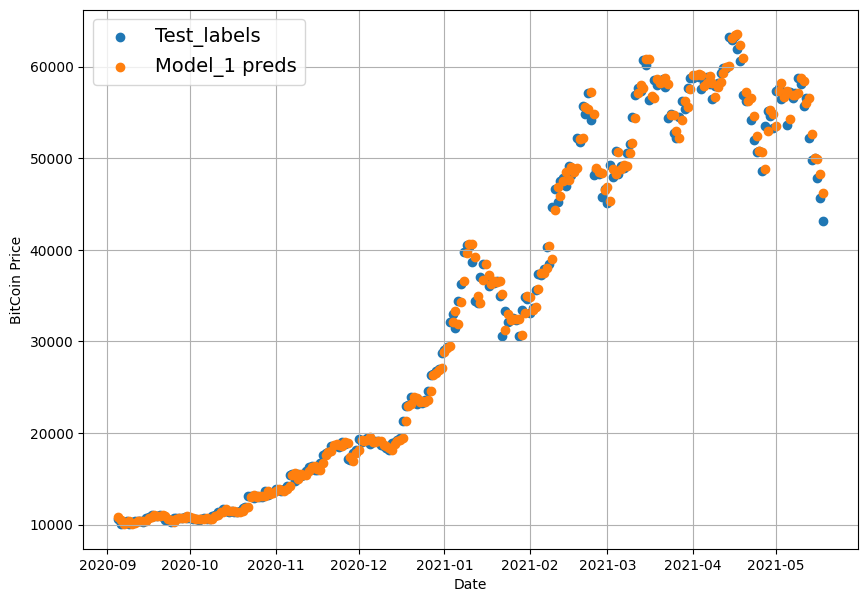

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_labels")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="Model_1 preds")

## Model 2: Same as Model 1 (WINDOW=30, HORIZON=1)

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=30, horizon=1)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
# Create model 2
tf.random.set_seed(43)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="linear")
], name="model_2_dense")

# Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit the model
history_model_2 = model_2.fit(x=train_windows,
                              y=train_labels,
                              epochs=160,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_2.name)])

Epoch 1/160
 1/18 [>.............................] - ETA: 10s - loss: 3014.2410 - mae: 3014.2410 - mse: 19886774.0000

18/18 [==============================] - 1s 48ms/step - loss: 878.2744 - mae: 878.2744 - mse: 3034344.7500 - val_loss: 2014.6184 - val_mae: 2014.6184 - val_mse: 11703829.0000
Epoch 2/160
 1/18 [>.............................] - ETA: 0s - loss: 438.9549 - mae: 438.9549 - mse: 898048.0000

18/18 [==============================] - 1s 38ms/step - loss: 440.0456 - mae: 440.0456 - mse: 835413.6875 - val_loss: 1752.9351 - val_mae: 1752.9351 - val_mse: 9119117.0000
Epoch 3/160
 1/18 [>.............................] - ETA: 0s - loss: 310.2738 - mae: 310.2738 - mse: 489128.0312

18/18 [==============================] - 1s 39ms/step - loss: 305.5813 - mae: 305.5813 - mse: 440995.3438 - val_loss: 1540.4086 - val_mae: 1540.4086 - val_mse: 7700962.0000
Epoch 4/160
18/18 [==============================] - 0s 4ms/step - loss: 299.2633 - mae: 299.2633 - mse: 418623.2188 - val_loss: 1643.6494 - val_mae: 1643.6494 - val_mse: 7251399.5000
Epoch 5/160
18/18 [==============================] - 0s 5ms/step - loss: 276.0001 - mae: 276.0001 - mse: 352773.2812 - val_loss: 1810.1926 - val_mae: 1810.1926 - val_mse: 8116706.5000
Epoch 6/160
 1/18 [>.............................] - ETA: 0s - loss: 342.1638 - mae: 342.1638 - mse: 399389.5625

18/18 [==============================] - 1s 39ms/step - loss: 244.8901 - mae: 244.8901 - mse: 290753.4062 - val_loss: 1407.3300 - val_mae: 1407.3300 - val_mse: 6448817.0000
Epoch 7/160
 1/18 [>.............................] - ETA: 0s - loss: 310.1773 - mae: 310.1773 - mse: 389977.4375

18/18 [==============================] - 1s 38ms/step - loss: 224.9904 - mae: 224.9904 - mse: 253815.3750 - val_loss: 1154.1903 - val_mae: 1154.1903 - val_mse: 4428358.5000
Epoch 8/160
18/18 [==============================] - 0s 5ms/step - loss: 209.3494 - mae: 209.3494 - mse: 219483.7188 - val_loss: 1232.9203 - val_mae: 1232.9203 - val_mse: 4367461.0000
Epoch 9/160
18/18 [==============================] - 0s 5ms/step - loss: 197.2699 - mae: 197.2699 - mse: 193219.6406 - val_loss: 1228.6600 - val_mae: 1228.6600 - val_mse: 4980266.5000
Epoch 10/160
 1/18 [>.............................] - ETA: 0s - loss: 226.2930 - mae: 226.2930 - mse: 278994.5000

18/18 [==============================] - 1s 39ms/step - loss: 221.2725 - mae: 221.2725 - mse: 227137.3125 - val_loss: 1092.8595 - val_mae: 1092.8595 - val_mse: 3540031.7500
Epoch 11/160
16/18 [=========================>....] - ETA: 0s - loss: 189.9638 - mae: 189.9638 - mse: 180855.0312

18/18 [==============================] - 1s 55ms/step - loss: 187.1309 - mae: 187.1309 - mse: 174685.4688 - val_loss: 989.1372 - val_mae: 989.1372 - val_mse: 3173649.5000
Epoch 12/160
17/18 [===========================>..] - ETA: 0s - loss: 170.9208 - mae: 170.9208 - mse: 151156.7188

18/18 [==============================] - 1s 55ms/step - loss: 169.9192 - mae: 169.9192 - mse: 149570.2969 - val_loss: 970.1400 - val_mae: 970.1400 - val_mse: 3195397.0000
Epoch 13/160
17/18 [===========================>..] - ETA: 0s - loss: 185.8463 - mae: 185.8463 - mse: 165290.1875

18/18 [==============================] - 1s 48ms/step - loss: 186.1175 - mae: 186.1175 - mse: 165207.7656 - val_loss: 967.3879 - val_mae: 967.3879 - val_mse: 3151076.2500
Epoch 14/160
18/18 [==============================] - 0s 4ms/step - loss: 163.1713 - mae: 163.1713 - mse: 137440.5781 - val_loss: 983.2789 - val_mae: 983.2789 - val_mse: 2851266.0000
Epoch 15/160
 1/18 [>.............................] - ETA: 0s - loss: 123.6964 - mae: 123.6964 - mse: 81092.2031

18/18 [==============================] - 1s 37ms/step - loss: 159.9451 - mae: 159.9451 - mse: 133711.0312 - val_loss: 904.7484 - val_mae: 904.7484 - val_mse: 2579731.7500
Epoch 16/160
18/18 [==============================] - 0s 4ms/step - loss: 162.7224 - mae: 162.7224 - mse: 129379.6719 - val_loss: 1191.2910 - val_mae: 1191.2910 - val_mse: 4318532.0000
Epoch 17/160
 1/18 [>.............................] - ETA: 0s - loss: 184.8901 - mae: 184.8901 - mse: 141520.1406

18/18 [==============================] - 1s 37ms/step - loss: 165.5291 - mae: 165.5291 - mse: 131440.2500 - val_loss: 859.2880 - val_mae: 859.2880 - val_mse: 2413672.7500
Epoch 18/160
18/18 [==============================] - 0s 5ms/step - loss: 162.8972 - mae: 162.8972 - mse: 134143.7656 - val_loss: 1199.0575 - val_mae: 1199.0575 - val_mse: 4292393.5000
Epoch 19/160
18/18 [==============================] - 0s 5ms/step - loss: 179.0176 - mae: 179.0176 - mse: 152828.4062 - val_loss: 1141.9479 - val_mae: 1141.9479 - val_mse: 3932849.2500
Epoch 20/160
18/18 [==============================] - 0s 5ms/step - loss: 175.7695 - mae: 175.7695 - mse: 142489.3594 - val_loss: 1140.0612 - val_mae: 1140.0612 - val_mse: 3332758.2500
Epoch 21/160
 1/18 [>.............................] - ETA: 0s - loss: 200.1992 - mae: 200.1992 - mse: 163449.2812

18/18 [==============================] - 1s 38ms/step - loss: 171.3573 - mae: 171.3573 - mse: 133940.7031 - val_loss: 821.7765 - val_mae: 821.7765 - val_mse: 2217748.2500
Epoch 22/160
 1/18 [>.............................] - ETA: 0s - loss: 136.6266 - mae: 136.6266 - mse: 96628.1328

18/18 [==============================] - 1s 39ms/step - loss: 154.2786 - mae: 154.2786 - mse: 119097.5312 - val_loss: 803.8441 - val_mae: 803.8441 - val_mse: 2092081.3750
Epoch 23/160
18/18 [==============================] - 0s 5ms/step - loss: 170.1122 - mae: 170.1122 - mse: 126673.3281 - val_loss: 855.8443 - val_mae: 855.8443 - val_mse: 2373303.0000
Epoch 24/160
 1/18 [>.............................] - ETA: 0s - loss: 156.3542 - mae: 156.3542 - mse: 154952.9062

18/18 [==============================] - 1s 58ms/step - loss: 152.6362 - mae: 152.6362 - mse: 118936.1172 - val_loss: 791.9940 - val_mae: 791.9940 - val_mse: 2059135.2500
Epoch 25/160
18/18 [==============================] - 0s 5ms/step - loss: 141.6581 - mae: 141.6581 - mse: 103743.6953 - val_loss: 800.8365 - val_mae: 800.8365 - val_mse: 2103804.2500
Epoch 26/160
18/18 [==============================] - 0s 4ms/step - loss: 154.6513 - mae: 154.6513 - mse: 116430.8750 - val_loss: 817.9492 - val_mae: 817.9492 - val_mse: 2193467.5000
Epoch 27/160
18/18 [==============================] - 0s 6ms/step - loss: 137.3427 - mae: 137.3427 - mse: 101326.3750 - val_loss: 845.6924 - val_mae: 845.6924 - val_mse: 2135662.7500
Epoch 28/160
18/18 [==============================] - 0s 4ms/step - loss: 138.5696 - mae: 138.5696 - mse: 102320.2656 - val_loss: 864.2678 - val_mae: 864.2678 - val_mse: 2394368.2500
Epoch 29/160
18/18 [==============================] - 0s 5ms/step - loss: 138.0613 - mae: 138.061

18/18 [==============================] - 1s 39ms/step - loss: 134.0998 - mae: 134.0998 - mse: 95644.6406 - val_loss: 752.4868 - val_mae: 752.4868 - val_mse: 1870183.3750
Epoch 31/160
18/18 [==============================] - 0s 5ms/step - loss: 137.4662 - mae: 137.4662 - mse: 100808.4453 - val_loss: 875.2021 - val_mae: 875.2021 - val_mse: 2200802.2500
Epoch 32/160
18/18 [==============================] - 0s 5ms/step - loss: 145.0542 - mae: 145.0542 - mse: 108223.0859 - val_loss: 768.7128 - val_mae: 768.7128 - val_mse: 1877681.8750
Epoch 33/160
18/18 [==============================] - 0s 4ms/step - loss: 137.1151 - mae: 137.1151 - mse: 96733.4453 - val_loss: 833.2338 - val_mae: 833.2338 - val_mse: 2053108.0000
Epoch 34/160
18/18 [==============================] - 0s 5ms/step - loss: 163.8122 - mae: 163.8122 - mse: 125382.7656 - val_loss: 1096.4436 - val_mae: 1096.4436 - val_mse: 3410307.5000
Epoch 35/160
18/18 [==============================] - 0s 5ms/step - loss: 151.9258 - mae: 151.925

18/18 [==============================] - 1s 38ms/step - loss: 152.2749 - mae: 152.2749 - mse: 111799.2422 - val_loss: 718.4402 - val_mae: 718.4402 - val_mse: 1709866.3750
Epoch 40/160
18/18 [==============================] - 0s 4ms/step - loss: 128.4196 - mae: 128.4196 - mse: 90682.7422 - val_loss: 741.7776 - val_mae: 741.7776 - val_mse: 1816274.7500
Epoch 41/160
18/18 [==============================] - 0s 4ms/step - loss: 126.5767 - mae: 126.5767 - mse: 89535.1172 - val_loss: 917.5423 - val_mae: 917.5423 - val_mse: 2283633.2500
Epoch 42/160
18/18 [==============================] - 0s 5ms/step - loss: 137.5064 - mae: 137.5064 - mse: 94129.0469 - val_loss: 1079.7223 - val_mae: 1079.7223 - val_mse: 3244541.0000
Epoch 43/160
18/18 [==============================] - 0s 4ms/step - loss: 151.5481 - mae: 151.5481 - mse: 110402.3359 - val_loss: 720.8033 - val_mae: 720.8033 - val_mse: 1684420.6250
Epoch 44/160
18/18 [==============================] - 0s 5ms/step - loss: 152.4322 - mae: 152.4322

18/18 [==============================] - 1s 37ms/step - loss: 152.1711 - mae: 152.1711 - mse: 104688.4844 - val_loss: 703.4174 - val_mae: 703.4174 - val_mse: 1627370.6250
Epoch 46/160
18/18 [==============================] - 0s 4ms/step - loss: 143.1661 - mae: 143.1661 - mse: 99103.8750 - val_loss: 908.9467 - val_mae: 908.9467 - val_mse: 2266108.0000
Epoch 47/160
18/18 [==============================] - 0s 5ms/step - loss: 151.6511 - mae: 151.6511 - mse: 109880.5078 - val_loss: 772.4340 - val_mae: 772.4340 - val_mse: 1917373.6250
Epoch 48/160
18/18 [==============================] - 0s 6ms/step - loss: 147.0289 - mae: 147.0289 - mse: 102811.4688 - val_loss: 715.0447 - val_mae: 715.0447 - val_mse: 1617544.6250
Epoch 49/160
18/18 [==============================] - 0s 4ms/step - loss: 134.4143 - mae: 134.4143 - mse: 96364.0391 - val_loss: 829.0486 - val_mae: 829.0486 - val_mse: 1971463.3750
Epoch 50/160
18/18 [==============================] - 0s 4ms/step - loss: 141.3918 - mae: 141.3918 

18/18 [==============================] - 1s 38ms/step - loss: 157.3609 - mae: 157.3609 - mse: 112670.1406 - val_loss: 693.7874 - val_mae: 693.7874 - val_mse: 1595083.3750
Epoch 52/160
 1/18 [>.............................] - ETA: 0s - loss: 162.7454 - mae: 162.7454 - mse: 155980.5312

18/18 [==============================] - 1s 39ms/step - loss: 143.4267 - mae: 143.4267 - mse: 101894.8438 - val_loss: 686.3046 - val_mae: 686.3046 - val_mse: 1574833.7500
Epoch 53/160
18/18 [==============================] - 0s 5ms/step - loss: 148.0580 - mae: 148.0580 - mse: 105346.3203 - val_loss: 800.6064 - val_mae: 800.6064 - val_mse: 1888230.6250
Epoch 54/160
18/18 [==============================] - 0s 8ms/step - loss: 137.1148 - mae: 137.1148 - mse: 94150.3125 - val_loss: 1231.5054 - val_mae: 1231.5054 - val_mse: 3594081.7500
Epoch 55/160
18/18 [==============================] - 0s 7ms/step - loss: 141.6863 - mae: 141.6863 - mse: 98298.6172 - val_loss: 787.6847 - val_mae: 787.6847 - val_mse: 1853244.0000
Epoch 56/160
18/18 [==============================] - 0s 7ms/step - loss: 133.6165 - mae: 133.6165 - mse: 93228.6016 - val_loss: 701.5453 - val_mae: 701.5453 - val_mse: 1650071.7500
Epoch 57/160
18/18 [==============================] - 0s 7ms/step - loss: 124.7522 - mae: 124.7522

18/18 [==============================] - 1s 55ms/step - loss: 120.6463 - mae: 120.6463 - mse: 80381.2891 - val_loss: 677.0516 - val_mae: 677.0516 - val_mse: 1533249.5000
Epoch 69/160
18/18 [==============================] - 0s 4ms/step - loss: 119.5527 - mae: 119.5527 - mse: 80150.0391 - val_loss: 679.4718 - val_mae: 679.4718 - val_mse: 1499957.2500
Epoch 70/160
18/18 [==============================] - 0s 5ms/step - loss: 140.1361 - mae: 140.1361 - mse: 98975.4766 - val_loss: 761.5750 - val_mae: 761.5750 - val_mse: 1847465.0000
Epoch 71/160
 1/18 [>.............................] - ETA: 0s - loss: 130.4222 - mae: 130.4222 - mse: 60185.7031

18/18 [==============================] - 1s 38ms/step - loss: 130.1428 - mae: 130.1428 - mse: 88275.0391 - val_loss: 665.2036 - val_mae: 665.2036 - val_mse: 1485180.7500
Epoch 72/160
 1/18 [>.............................] - ETA: 0s - loss: 83.1738 - mae: 83.1738 - mse: 34610.7656

18/18 [==============================] - 1s 37ms/step - loss: 120.8582 - mae: 120.8582 - mse: 80619.4688 - val_loss: 655.3997 - val_mae: 655.3997 - val_mse: 1447094.3750
Epoch 73/160
18/18 [==============================] - 0s 4ms/step - loss: 118.2545 - mae: 118.2545 - mse: 79985.2344 - val_loss: 1025.6400 - val_mae: 1025.6400 - val_mse: 2665704.2500
Epoch 74/160
18/18 [==============================] - 0s 5ms/step - loss: 154.8883 - mae: 154.8883 - mse: 106132.5312 - val_loss: 789.9324 - val_mae: 789.9324 - val_mse: 1816469.3750
Epoch 75/160
18/18 [==============================] - 0s 4ms/step - loss: 135.8640 - mae: 135.8640 - mse: 94788.4297 - val_loss: 858.0621 - val_mae: 858.0621 - val_mse: 2029015.6250
Epoch 76/160
18/18 [==============================] - 0s 4ms/step - loss: 134.7225 - mae: 134.7225 - mse: 94404.4141 - val_loss: 660.5289 - val_mae: 660.5289 - val_mse: 1458890.8750
Epoch 77/160
18/18 [==============================] - 0s 4ms/step - loss: 141.3477 - mae: 141.3477 

18/18 [==============================] - 1s 37ms/step - loss: 120.7002 - mae: 120.7002 - mse: 80757.8359 - val_loss: 651.5277 - val_mae: 651.5277 - val_mse: 1441772.5000
Epoch 81/160
18/18 [==============================] - 0s 4ms/step - loss: 124.7631 - mae: 124.7631 - mse: 82753.9766 - val_loss: 1167.9408 - val_mae: 1167.9408 - val_mse: 3206899.0000
Epoch 82/160
18/18 [==============================] - 0s 5ms/step - loss: 184.1737 - mae: 184.1737 - mse: 137607.9375 - val_loss: 1238.6764 - val_mae: 1238.6764 - val_mse: 3563635.5000
Epoch 83/160
18/18 [==============================] - 0s 5ms/step - loss: 200.0520 - mae: 200.0520 - mse: 152587.8125 - val_loss: 1029.1084 - val_mae: 1029.1084 - val_mse: 2859813.2500
Epoch 84/160
18/18 [==============================] - 0s 4ms/step - loss: 131.0269 - mae: 131.0269 - mse: 83077.7344 - val_loss: 669.2337 - val_mae: 669.2337 - val_mse: 1490859.1250
Epoch 85/160
18/18 [==============================] - 0s 4ms/step - loss: 115.4983 - mae: 115.

18/18 [==============================] - 1s 36ms/step - loss: 127.3304 - mae: 127.3304 - mse: 84511.2422 - val_loss: 642.0279 - val_mae: 642.0279 - val_mse: 1394164.8750
Epoch 104/160
18/18 [==============================] - 0s 4ms/step - loss: 127.6571 - mae: 127.6571 - mse: 85999.6094 - val_loss: 755.8621 - val_mae: 755.8621 - val_mse: 1697819.5000
Epoch 105/160
18/18 [==============================] - 0s 5ms/step - loss: 138.5765 - mae: 138.5765 - mse: 93393.6016 - val_loss: 658.5170 - val_mae: 658.5170 - val_mse: 1433796.2500
Epoch 106/160
18/18 [==============================] - 0s 5ms/step - loss: 129.5631 - mae: 129.5631 - mse: 86790.6484 - val_loss: 726.2768 - val_mae: 726.2768 - val_mse: 1603067.5000
Epoch 107/160
18/18 [==============================] - 0s 4ms/step - loss: 148.9286 - mae: 148.9286 - mse: 102532.2500 - val_loss: 1142.3937 - val_mae: 1142.3937 - val_mse: 3368891.2500
Epoch 108/160
18/18 [==============================] - 0s 4ms/step - loss: 155.2633 - mae: 155.

18/18 [==============================] - 1s 38ms/step - loss: 137.5448 - mae: 137.5448 - mse: 89368.8906 - val_loss: 632.6854 - val_mae: 632.6854 - val_mse: 1343492.8750
Epoch 111/160
18/18 [==============================] - 0s 5ms/step - loss: 116.9162 - mae: 116.9162 - mse: 76605.8047 - val_loss: 695.3394 - val_mae: 695.3394 - val_mse: 1558253.5000
Epoch 112/160
18/18 [==============================] - 0s 5ms/step - loss: 118.7853 - mae: 118.7853 - mse: 77514.9141 - val_loss: 639.3762 - val_mae: 639.3762 - val_mse: 1358168.6250
Epoch 113/160
18/18 [==============================] - 0s 5ms/step - loss: 124.0036 - mae: 124.0036 - mse: 81301.2344 - val_loss: 959.3279 - val_mae: 959.3279 - val_mse: 2365467.2500
Epoch 114/160
18/18 [==============================] - 0s 4ms/step - loss: 143.8694 - mae: 143.8694 - mse: 96778.0625 - val_loss: 1349.0150 - val_mae: 1349.0150 - val_mse: 4091383.7500
Epoch 115/160
18/18 [==============================] - 0s 4ms/step - loss: 180.3072 - mae: 180.3

18/18 [==============================] - 1s 38ms/step - loss: 120.7539 - mae: 120.7539 - mse: 79303.9844 - val_loss: 622.3808 - val_mae: 622.3808 - val_mse: 1325754.1250
Epoch 121/160
 1/18 [>.............................] - ETA: 0s - loss: 128.2097 - mae: 128.2097 - mse: 119929.1094

18/18 [==============================] - 1s 38ms/step - loss: 117.7213 - mae: 117.7213 - mse: 76614.1484 - val_loss: 622.3080 - val_mae: 622.3080 - val_mse: 1324191.5000
Epoch 122/160
18/18 [==============================] - 0s 4ms/step - loss: 114.9683 - mae: 114.9683 - mse: 77147.8984 - val_loss: 636.6941 - val_mae: 636.6941 - val_mse: 1349472.8750
Epoch 123/160
18/18 [==============================] - 0s 4ms/step - loss: 117.9310 - mae: 117.9310 - mse: 76890.1797 - val_loss: 758.2886 - val_mae: 758.2886 - val_mse: 1686558.8750
Epoch 124/160
18/18 [==============================] - 0s 5ms/step - loss: 122.1318 - mae: 122.1318 - mse: 80622.0469 - val_loss: 667.3801 - val_mae: 667.3801 - val_mse: 1421706.2500
Epoch 125/160
18/18 [==============================] - 0s 5ms/step - loss: 119.5020 - mae: 119.5020 - mse: 75116.8750 - val_loss: 691.9045 - val_mae: 691.9045 - val_mse: 1541594.3750
Epoch 126/160
18/18 [==============================] - 0s 4ms/step - loss: 129.9951 - mae: 129.995

18/18 [==============================] - 1s 54ms/step - loss: 116.6153 - mae: 116.6153 - mse: 75563.8672 - val_loss: 614.2126 - val_mae: 614.2126 - val_mse: 1303586.3750
Epoch 145/160
18/18 [==============================] - 0s 7ms/step - loss: 129.0754 - mae: 129.0754 - mse: 84886.7969 - val_loss: 631.3207 - val_mae: 631.3207 - val_mse: 1341642.2500
Epoch 146/160
18/18 [==============================] - 0s 6ms/step - loss: 120.2809 - mae: 120.2809 - mse: 76770.3984 - val_loss: 619.5866 - val_mae: 619.5866 - val_mse: 1311731.3750
Epoch 147/160
18/18 [==============================] - 0s 7ms/step - loss: 110.6616 - mae: 110.6616 - mse: 71603.4922 - val_loss: 620.9708 - val_mae: 620.9708 - val_mse: 1305091.1250
Epoch 148/160
18/18 [==============================] - 0s 7ms/step - loss: 156.4381 - mae: 156.4381 - mse: 105238.3750 - val_loss: 691.6942 - val_mae: 691.6942 - val_mse: 1486297.3750
Epoch 149/160
18/18 [==============================] - 0s 7ms/step - loss: 131.3930 - mae: 131.39

In [ ]:
# Evaluate the model
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 663.6232 - mae: 663.6232 - mse: 1446291.8750


[663.6231689453125, 663.6231689453125, 1446291.875]

In [ ]:
# Load the best performing model
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 614.2126 - mae: 614.2126 - mse: 1303586.3750


[614.212646484375, 614.212646484375, 1303586.375]

### Making prediction on model 2

In [ ]:
model_2_preds = make_preds(model=model_2, input_data=test_windows)
model_2_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8895.978 , 8872.016 , 8782.222 , 8589.312 , 8444.667 , 8431.169 ,
       8155.2363, 8158.233 , 8219.602 , 7771.4624], dtype=float32)>

In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 614.21265,
 'mse': 1303586.1,
 'rmse': 1141.747,
 'mape': 2.8141918,
 'mase': 1.0736496}

In [ ]:
model_1_results

{'mae': 566.50433,
 'mse': 1158366.1,
 'rmse': 1076.2742,
 'mape': 2.5341477,
 'mase': 0.9951912}

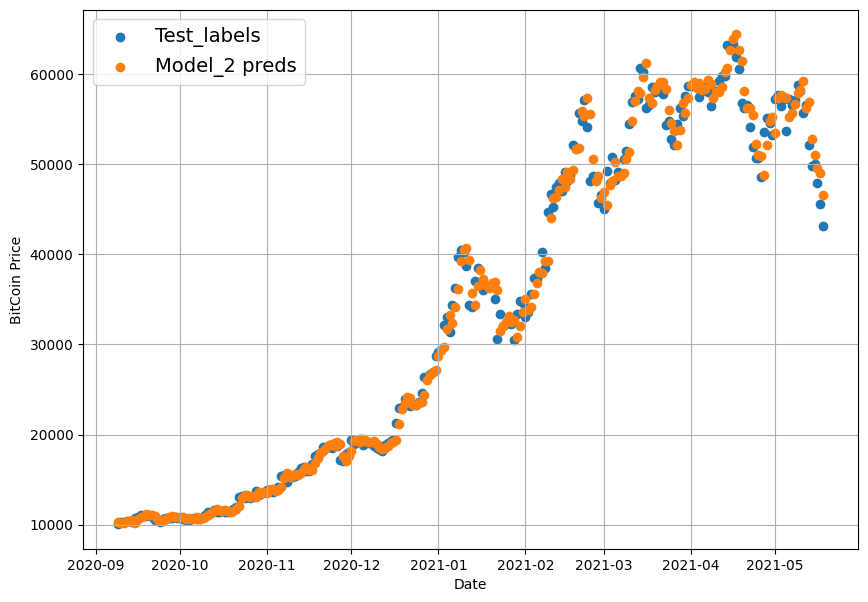

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_labels")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format="-",
                 label="Model_2 preds")

## Model 3: Same as model 1 (WINDOW=30, HORIZON=7)

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=30, horizon=7)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
# Create model 2
tf.random.set_seed(43)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=7, activation="linear")
], name="model_3_dense")

# Compile the model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit the model
history_model_3 = model_3.fit(x=train_windows,
                              y=train_labels,
                              epochs=160,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_3.name)])

Epoch 1/160
 1/18 [>.............................] - ETA: 10s - loss: 3379.5586 - mae: 3379.5586 - mse: 32585998.0000

18/18 [==============================] - 2s 69ms/step - loss: 1814.7144 - mae: 1814.7144 - mse: 13434612.0000 - val_loss: 2967.8389 - val_mae: 2967.8389 - val_mse: 23548964.0000
Epoch 2/160
 1/18 [>.............................] - ETA: 0s - loss: 633.7006 - mae: 633.7006 - mse: 1812216.7500

18/18 [==============================] - 1s 37ms/step - loss: 530.3755 - mae: 530.3755 - mse: 1290092.1250 - val_loss: 2455.1794 - val_mae: 2455.1794 - val_mse: 17161944.0000
Epoch 3/160
 1/18 [>.............................] - ETA: 0s - loss: 359.2448 - mae: 359.2448 - mse: 804465.3750

18/18 [==============================] - 1s 39ms/step - loss: 419.7346 - mae: 419.7346 - mse: 870193.3750 - val_loss: 2092.7310 - val_mae: 2092.7310 - val_mse: 12852044.0000
Epoch 4/160
18/18 [==============================] - 0s 5ms/step - loss: 385.0664 - mae: 385.0664 - mse: 743563.8125 - val_loss: 2098.8267 - val_mae: 2098.8267 - val_mse: 12980583.0000
Epoch 5/160
 1/18 [>.............................] - ETA: 0s - loss: 427.2941 - mae: 427.2941 - mse: 774946.1250

18/18 [==============================] - 1s 38ms/step - loss: 373.0446 - mae: 373.0446 - mse: 687998.8125 - val_loss: 1935.0059 - val_mae: 1935.0059 - val_mse: 11430065.0000
Epoch 6/160
 1/18 [>.............................] - ETA: 0s - loss: 326.2666 - mae: 326.2666 - mse: 553066.0625

18/18 [==============================] - 1s 38ms/step - loss: 351.4767 - mae: 351.4767 - mse: 609646.8750 - val_loss: 1785.6805 - val_mae: 1785.6805 - val_mse: 9888106.0000
Epoch 7/160
 1/18 [>.............................] - ETA: 0s - loss: 303.2513 - mae: 303.2513 - mse: 368619.2500

18/18 [==============================] - 1s 37ms/step - loss: 334.3719 - mae: 334.3719 - mse: 549251.1875 - val_loss: 1677.4047 - val_mae: 1677.4047 - val_mse: 8824924.0000
Epoch 8/160
18/18 [==============================] - 0s 4ms/step - loss: 318.6007 - mae: 318.6007 - mse: 505324.4062 - val_loss: 1686.3207 - val_mae: 1686.3207 - val_mse: 8840368.0000
Epoch 9/160
 1/18 [>.............................] - ETA: 0s - loss: 322.7495 - mae: 322.7495 - mse: 591122.5000

18/18 [==============================] - 1s 37ms/step - loss: 309.0553 - mae: 309.0553 - mse: 476824.5312 - val_loss: 1609.4009 - val_mae: 1609.4009 - val_mse: 8203384.0000
Epoch 10/160
18/18 [==============================] - 0s 4ms/step - loss: 301.9597 - mae: 301.9597 - mse: 459599.3438 - val_loss: 1712.2273 - val_mae: 1712.2273 - val_mse: 8990950.0000
Epoch 11/160
18/18 [==============================] - 0s 5ms/step - loss: 297.1503 - mae: 297.1503 - mse: 438210.4062 - val_loss: 1616.6876 - val_mae: 1616.6876 - val_mse: 8211528.5000
Epoch 12/160
18/18 [==============================] - 0s 4ms/step - loss: 295.8011 - mae: 295.8011 - mse: 433614.5312 - val_loss: 1693.3105 - val_mae: 1693.3105 - val_mse: 8621314.0000
Epoch 13/160
18/18 [==============================] - 0s 4ms/step - loss: 289.7155 - mae: 289.7155 - mse: 420935.6562 - val_loss: 1622.4524 - val_mae: 1622.4524 - val_mse: 8117515.5000
Epoch 14/160
 1/18 [>.............................] - ETA: 0s - loss: 302.2966 - mae: 3

18/18 [==============================] - 1s 37ms/step - loss: 286.5785 - mae: 286.5785 - mse: 415290.9375 - val_loss: 1606.4974 - val_mae: 1606.4974 - val_mse: 8003828.5000
Epoch 15/160
 1/18 [>.............................] - ETA: 0s - loss: 284.4879 - mae: 284.4879 - mse: 404186.1875

18/18 [==============================] - 1s 39ms/step - loss: 279.6403 - mae: 279.6403 - mse: 400553.7188 - val_loss: 1549.3621 - val_mae: 1549.3621 - val_mse: 7551487.0000
Epoch 16/160
18/18 [==============================] - ETA: 0s - loss: 277.2159 - mae: 277.2159 - mse: 394017.5312

18/18 [==============================] - 1s 57ms/step - loss: 277.2159 - mae: 277.2159 - mse: 394017.5312 - val_loss: 1520.1237 - val_mae: 1520.1237 - val_mse: 7386701.0000
Epoch 17/160
18/18 [==============================] - ETA: 0s - loss: 272.1508 - mae: 272.1508 - mse: 381203.5312

18/18 [==============================] - 1s 56ms/step - loss: 272.1508 - mae: 272.1508 - mse: 381203.5312 - val_loss: 1486.3458 - val_mae: 1486.3458 - val_mse: 7179157.0000
Epoch 18/160
18/18 [==============================] - 0s 7ms/step - loss: 278.3716 - mae: 278.3716 - mse: 395662.5625 - val_loss: 1565.4406 - val_mae: 1565.4406 - val_mse: 7619187.0000
Epoch 19/160
18/18 [==============================] - 0s 7ms/step - loss: 274.6494 - mae: 274.6494 - mse: 382265.7188 - val_loss: 1504.6138 - val_mae: 1504.6138 - val_mse: 7216026.0000
Epoch 20/160
18/18 [==============================] - 0s 7ms/step - loss: 266.2439 - mae: 266.2439 - mse: 367667.9375 - val_loss: 1609.4930 - val_mae: 1609.4930 - val_mse: 7823744.5000
Epoch 21/160
18/18 [==============================] - 0s 8ms/step - loss: 271.9492 - mae: 271.9492 - mse: 372924.4375 - val_loss: 1577.2371 - val_mae: 1577.2371 - val_mse: 7709158.5000
Epoch 22/160
17/18 [===========================>..] - ETA: 0s - loss: 272.7914 - mae: 2

18/18 [==============================] - 1s 39ms/step - loss: 273.2627 - mae: 273.2627 - mse: 376328.4375 - val_loss: 1447.8081 - val_mae: 1447.8081 - val_mse: 6892584.0000
Epoch 23/160
18/18 [==============================] - 0s 5ms/step - loss: 265.4003 - mae: 265.4003 - mse: 362089.4062 - val_loss: 1458.6871 - val_mae: 1458.6871 - val_mse: 6984262.0000
Epoch 24/160
18/18 [==============================] - 0s 4ms/step - loss: 260.4695 - mae: 260.4695 - mse: 351913.8750 - val_loss: 1554.3698 - val_mae: 1554.3698 - val_mse: 7386449.0000
Epoch 25/160
18/18 [==============================] - 0s 5ms/step - loss: 259.7424 - mae: 259.7424 - mse: 350347.2812 - val_loss: 1531.1194 - val_mae: 1531.1194 - val_mse: 7243443.5000
Epoch 26/160
18/18 [==============================] - 0s 5ms/step - loss: 255.0016 - mae: 255.0016 - mse: 341565.6250 - val_loss: 1482.4038 - val_mae: 1482.4038 - val_mse: 7029890.0000
Epoch 27/160
18/18 [==============================] - 0s 5ms/step - loss: 255.6382 - ma

18/18 [==============================] - 1s 40ms/step - loss: 253.1541 - mae: 253.1541 - mse: 333329.2500 - val_loss: 1380.6218 - val_mae: 1380.6218 - val_mse: 6387265.0000
Epoch 31/160
18/18 [==============================] - 0s 4ms/step - loss: 252.4603 - mae: 252.4603 - mse: 331601.9688 - val_loss: 1458.8566 - val_mae: 1458.8566 - val_mse: 6689828.0000
Epoch 32/160
 1/18 [>.............................] - ETA: 0s - loss: 245.7354 - mae: 245.7354 - mse: 365737.1250

18/18 [==============================] - 1s 37ms/step - loss: 256.2576 - mae: 256.2576 - mse: 341075.8438 - val_loss: 1370.5232 - val_mae: 1370.5232 - val_mse: 6322674.5000
Epoch 33/160
 1/18 [>.............................] - ETA: 0s - loss: 262.2813 - mae: 262.2813 - mse: 371785.5625

18/18 [==============================] - 1s 37ms/step - loss: 250.7306 - mae: 250.7306 - mse: 330330.3750 - val_loss: 1368.3330 - val_mae: 1368.3330 - val_mse: 6324363.0000
Epoch 34/160
18/18 [==============================] - 0s 5ms/step - loss: 250.3857 - mae: 250.3857 - mse: 325491.3125 - val_loss: 1372.8330 - val_mae: 1372.8330 - val_mse: 6345087.0000
Epoch 35/160
 1/18 [>.............................] - ETA: 0s - loss: 366.5764 - mae: 366.5764 - mse: 644207.9375

18/18 [==============================] - 1s 37ms/step - loss: 252.6731 - mae: 252.6731 - mse: 329027.1875 - val_loss: 1364.3510 - val_mae: 1364.3510 - val_mse: 6276214.0000
Epoch 36/160
18/18 [==============================] - 0s 5ms/step - loss: 248.8005 - mae: 248.8005 - mse: 321966.8125 - val_loss: 1632.7946 - val_mae: 1632.7946 - val_mse: 7814904.0000
Epoch 37/160
 1/18 [>.............................] - ETA: 0s - loss: 276.4672 - mae: 276.4672 - mse: 332027.1562

18/18 [==============================] - 1s 57ms/step - loss: 265.1233 - mae: 265.1233 - mse: 340847.1875 - val_loss: 1349.0759 - val_mae: 1349.0759 - val_mse: 6131947.5000
Epoch 38/160
18/18 [==============================] - 0s 4ms/step - loss: 246.7320 - mae: 246.7320 - mse: 316772.9688 - val_loss: 1376.9941 - val_mae: 1376.9941 - val_mse: 6232643.0000
Epoch 39/160
18/18 [==============================] - 0s 5ms/step - loss: 244.0073 - mae: 244.0073 - mse: 315534.0625 - val_loss: 1548.3882 - val_mae: 1548.3882 - val_mse: 7332405.0000
Epoch 40/160
18/18 [==============================] - 0s 4ms/step - loss: 254.9666 - mae: 254.9666 - mse: 327063.6250 - val_loss: 1380.1775 - val_mae: 1380.1775 - val_mse: 6229489.0000
Epoch 41/160
18/18 [==============================] - 0s 5ms/step - loss: 263.3214 - mae: 263.3214 - mse: 336445.5625 - val_loss: 1585.9912 - val_mae: 1585.9912 - val_mse: 7426566.5000
Epoch 42/160
18/18 [==============================] - 0s 5ms/step - loss: 246.9077 - ma

18/18 [==============================] - 1s 37ms/step - loss: 238.7200 - mae: 238.7200 - mse: 301455.7812 - val_loss: 1327.5594 - val_mae: 1327.5594 - val_mse: 5896442.0000
Epoch 48/160
 1/18 [>.............................] - ETA: 0s - loss: 221.1363 - mae: 221.1363 - mse: 230004.1562

18/18 [==============================] - 1s 37ms/step - loss: 237.6396 - mae: 237.6396 - mse: 298839.3125 - val_loss: 1309.2236 - val_mae: 1309.2236 - val_mse: 5872831.5000
Epoch 49/160
18/18 [==============================] - 0s 5ms/step - loss: 237.9164 - mae: 237.9164 - mse: 295942.3125 - val_loss: 1310.7714 - val_mae: 1310.7714 - val_mse: 5846176.0000
Epoch 50/160
18/18 [==============================] - 0s 5ms/step - loss: 239.9532 - mae: 239.9532 - mse: 301675.1562 - val_loss: 1316.0748 - val_mae: 1316.0748 - val_mse: 5829951.5000
Epoch 51/160
18/18 [==============================] - 0s 5ms/step - loss: 237.9187 - mae: 237.9187 - mse: 299787.6250 - val_loss: 1314.4712 - val_mae: 1314.4712 - val_mse: 5848653.5000
Epoch 52/160
18/18 [==============================] - 0s 4ms/step - loss: 233.8055 - mae: 233.8055 - mse: 292105.2812 - val_loss: 1310.8390 - val_mae: 1310.8390 - val_mse: 5802008.5000
Epoch 53/160
18/18 [==============================] - 0s 4ms/step - loss: 233.5147 - ma

18/18 [==============================] - 1s 38ms/step - loss: 240.1385 - mae: 240.1385 - mse: 298846.8125 - val_loss: 1307.0537 - val_mae: 1307.0537 - val_mse: 5800498.5000
Epoch 57/160
 1/18 [>.............................] - ETA: 0s - loss: 215.7480 - mae: 215.7480 - mse: 195600.8750

18/18 [==============================] - 1s 38ms/step - loss: 241.6855 - mae: 241.6855 - mse: 299809.6875 - val_loss: 1305.7589 - val_mae: 1305.7589 - val_mse: 5801670.0000
Epoch 58/160
18/18 [==============================] - 0s 4ms/step - loss: 239.0708 - mae: 239.0708 - mse: 297808.6562 - val_loss: 1360.9684 - val_mae: 1360.9684 - val_mse: 5999194.0000
Epoch 59/160
18/18 [==============================] - 0s 4ms/step - loss: 234.0325 - mae: 234.0325 - mse: 290754.4062 - val_loss: 1349.3483 - val_mae: 1349.3483 - val_mse: 6249371.5000
Epoch 60/160
 1/18 [>.............................] - ETA: 0s - loss: 238.4523 - mae: 238.4523 - mse: 343379.1875

18/18 [==============================] - 1s 41ms/step - loss: 240.7249 - mae: 240.7249 - mse: 302472.6250 - val_loss: 1289.2493 - val_mae: 1289.2493 - val_mse: 5751539.5000
Epoch 61/160
18/18 [==============================] - 0s 7ms/step - loss: 241.8795 - mae: 241.8795 - mse: 302767.5625 - val_loss: 1455.8835 - val_mae: 1455.8835 - val_mse: 6349476.0000
Epoch 62/160
18/18 [==============================] - 0s 6ms/step - loss: 235.4082 - mae: 235.4082 - mse: 287001.5938 - val_loss: 1409.9850 - val_mae: 1409.9850 - val_mse: 6147062.5000
Epoch 63/160
18/18 [==============================] - 0s 7ms/step - loss: 238.9838 - mae: 238.9838 - mse: 290210.2188 - val_loss: 1437.5081 - val_mae: 1437.5081 - val_mse: 6331877.0000
Epoch 64/160
18/18 [==============================] - ETA: 0s - loss: 238.6383 - mae: 238.6383 - mse: 286926.5938

18/18 [==============================] - 1s 56ms/step - loss: 238.6383 - mae: 238.6383 - mse: 286926.5938 - val_loss: 1278.3406 - val_mae: 1278.3406 - val_mse: 5627917.0000
Epoch 65/160
 1/18 [>.............................] - ETA: 0s - loss: 241.5108 - mae: 241.5108 - mse: 249443.7969

18/18 [==============================] - 1s 55ms/step - loss: 237.0836 - mae: 237.0836 - mse: 286658.7500 - val_loss: 1270.2371 - val_mae: 1270.2371 - val_mse: 5563576.5000
Epoch 66/160
18/18 [==============================] - 0s 8ms/step - loss: 230.6489 - mae: 230.6489 - mse: 281849.1875 - val_loss: 1283.6930 - val_mae: 1283.6930 - val_mse: 5626326.0000
Epoch 67/160
18/18 [==============================] - 0s 7ms/step - loss: 231.4234 - mae: 231.4234 - mse: 284449.1250 - val_loss: 1328.2748 - val_mae: 1328.2748 - val_mse: 5813613.5000
Epoch 68/160
18/18 [==============================] - 0s 5ms/step - loss: 238.3728 - mae: 238.3728 - mse: 294590.5000 - val_loss: 1630.5441 - val_mae: 1630.5441 - val_mse: 7675467.5000
Epoch 69/160
18/18 [==============================] - 0s 4ms/step - loss: 238.4876 - mae: 238.4876 - mse: 293509.8125 - val_loss: 1438.1272 - val_mae: 1438.1272 - val_mse: 6417224.5000
Epoch 70/160
18/18 [==============================] - 0s 4ms/step - loss: 238.7634 - ma

18/18 [==============================] - 1s 38ms/step - loss: 227.1339 - mae: 227.1339 - mse: 274107.9375 - val_loss: 1261.5068 - val_mae: 1261.5068 - val_mse: 5430074.5000
Epoch 80/160
18/18 [==============================] - 0s 5ms/step - loss: 228.6109 - mae: 228.6109 - mse: 276648.8125 - val_loss: 1296.1302 - val_mae: 1296.1302 - val_mse: 5591526.5000
Epoch 81/160
18/18 [==============================] - 0s 5ms/step - loss: 229.6900 - mae: 229.6900 - mse: 276268.5312 - val_loss: 1272.6461 - val_mae: 1272.6461 - val_mse: 5451058.5000
Epoch 82/160
18/18 [==============================] - 0s 4ms/step - loss: 231.7397 - mae: 231.7397 - mse: 281883.7188 - val_loss: 1303.9825 - val_mae: 1303.9825 - val_mse: 5582439.0000
Epoch 83/160
18/18 [==============================] - 0s 4ms/step - loss: 226.3170 - mae: 226.3170 - mse: 270912.7500 - val_loss: 1267.9512 - val_mae: 1267.9512 - val_mse: 5455845.0000
Epoch 84/160
18/18 [==============================] - 0s 4ms/step - loss: 226.0073 - ma

18/18 [==============================] - 1s 37ms/step - loss: 223.1064 - mae: 223.1064 - mse: 269165.3125 - val_loss: 1232.6786 - val_mae: 1232.6786 - val_mse: 5315745.5000
Epoch 93/160
18/18 [==============================] - 0s 5ms/step - loss: 224.0135 - mae: 224.0135 - mse: 271573.4062 - val_loss: 1483.0928 - val_mae: 1483.0928 - val_mse: 6600202.0000
Epoch 94/160
18/18 [==============================] - 0s 4ms/step - loss: 225.6609 - mae: 225.6609 - mse: 270644.5625 - val_loss: 1262.9132 - val_mae: 1262.9132 - val_mse: 5478418.0000
Epoch 95/160
18/18 [==============================] - 0s 5ms/step - loss: 225.2662 - mae: 225.2662 - mse: 271140.0938 - val_loss: 1262.5906 - val_mae: 1262.5906 - val_mse: 5425907.0000
Epoch 96/160
18/18 [==============================] - 0s 5ms/step - loss: 228.9432 - mae: 228.9432 - mse: 275462.2500 - val_loss: 1252.2181 - val_mae: 1252.2181 - val_mse: 5321266.5000
Epoch 97/160
18/18 [==============================] - 0s 5ms/step - loss: 225.5427 - ma

18/18 [==============================] - 1s 38ms/step - loss: 230.8572 - mae: 230.8572 - mse: 269421.2500 - val_loss: 1229.4113 - val_mae: 1229.4113 - val_mse: 5277713.5000
Epoch 116/160
18/18 [==============================] - 0s 5ms/step - loss: 227.0225 - mae: 227.0225 - mse: 266771.9375 - val_loss: 1232.5537 - val_mae: 1232.5537 - val_mse: 5303953.0000
Epoch 117/160
18/18 [==============================] - 0s 5ms/step - loss: 221.8801 - mae: 221.8801 - mse: 263074.9375 - val_loss: 1255.5630 - val_mae: 1255.5630 - val_mse: 5313978.0000
Epoch 118/160
18/18 [==============================] - 0s 5ms/step - loss: 219.4884 - mae: 219.4884 - mse: 261472.1406 - val_loss: 1244.4713 - val_mae: 1244.4713 - val_mse: 5410298.0000
Epoch 119/160
18/18 [==============================] - 0s 5ms/step - loss: 223.1632 - mae: 223.1632 - mse: 268957.0625 - val_loss: 1260.2169 - val_mae: 1260.2169 - val_mse: 5455424.0000
Epoch 120/160
18/18 [==============================] - 0s 4ms/step - loss: 235.2840

18/18 [==============================] - 1s 36ms/step - loss: 221.4874 - mae: 221.4874 - mse: 262964.9062 - val_loss: 1229.1559 - val_mae: 1229.1559 - val_mse: 5213466.5000
Epoch 125/160
18/18 [==============================] - 0s 5ms/step - loss: 222.6881 - mae: 222.6881 - mse: 261760.0625 - val_loss: 1477.6805 - val_mae: 1477.6805 - val_mse: 6455893.5000
Epoch 126/160
18/18 [==============================] - 0s 5ms/step - loss: 228.0772 - mae: 228.0772 - mse: 264888.8750 - val_loss: 1396.6544 - val_mae: 1396.6544 - val_mse: 5970997.0000
Epoch 127/160
18/18 [==============================] - 0s 4ms/step - loss: 222.0693 - mae: 222.0693 - mse: 257564.0156 - val_loss: 1236.5708 - val_mae: 1236.5708 - val_mse: 5264447.0000
Epoch 128/160
18/18 [==============================] - 0s 5ms/step - loss: 218.3937 - mae: 218.3937 - mse: 257206.0000 - val_loss: 1239.5634 - val_mae: 1239.5634 - val_mse: 5289397.5000
Epoch 129/160
18/18 [==============================] - 0s 4ms/step - loss: 219.3462

18/18 [==============================] - 1s 38ms/step - loss: 226.3129 - mae: 226.3129 - mse: 263797.1562 - val_loss: 1221.2781 - val_mae: 1221.2781 - val_mse: 5227592.0000
Epoch 134/160
18/18 [==============================] - 0s 5ms/step - loss: 220.9528 - mae: 220.9528 - mse: 260390.3438 - val_loss: 1226.1125 - val_mae: 1226.1125 - val_mse: 5206354.0000
Epoch 135/160
18/18 [==============================] - 0s 5ms/step - loss: 217.2215 - mae: 217.2215 - mse: 255322.9062 - val_loss: 1315.2751 - val_mae: 1315.2751 - val_mse: 5624199.0000
Epoch 136/160
18/18 [==============================] - 0s 5ms/step - loss: 220.6041 - mae: 220.6041 - mse: 258033.9844 - val_loss: 1290.2135 - val_mae: 1290.2135 - val_mse: 5499085.0000
Epoch 137/160
18/18 [==============================] - 0s 4ms/step - loss: 220.9301 - mae: 220.9301 - mse: 258377.5781 - val_loss: 1318.9515 - val_mae: 1318.9515 - val_mse: 5656233.0000
Epoch 138/160
18/18 [==============================] - 0s 4ms/step - loss: 222.2491

18/18 [==============================] - 1s 42ms/step - loss: 219.3113 - mae: 219.3113 - mse: 258388.3125 - val_loss: 1218.8182 - val_mae: 1218.8182 - val_mse: 5217615.5000
Epoch 140/160
18/18 [==============================] - 0s 7ms/step - loss: 220.3197 - mae: 220.3197 - mse: 258876.4219 - val_loss: 1241.6980 - val_mae: 1241.6980 - val_mse: 5300051.0000
Epoch 141/160
18/18 [==============================] - 0s 7ms/step - loss: 220.3114 - mae: 220.3114 - mse: 257672.9062 - val_loss: 1251.8629 - val_mae: 1251.8629 - val_mse: 5522182.0000
Epoch 142/160
18/18 [==============================] - 0s 7ms/step - loss: 222.3239 - mae: 222.3239 - mse: 259789.7969 - val_loss: 1399.7371 - val_mae: 1399.7371 - val_mse: 6026547.5000
Epoch 143/160
18/18 [==============================] - 0s 6ms/step - loss: 217.5766 - mae: 217.5766 - mse: 255753.7812 - val_loss: 1296.9849 - val_mae: 1296.9849 - val_mse: 5536359.5000
Epoch 144/160
18/18 [==============================] - 0s 6ms/step - loss: 222.7548

18/18 [==============================] - 1s 48ms/step - loss: 224.4384 - mae: 224.4384 - mse: 258450.2344 - val_loss: 1216.7489 - val_mae: 1216.7489 - val_mse: 5179958.0000
Epoch 157/160
18/18 [==============================] - 0s 5ms/step - loss: 219.1379 - mae: 219.1379 - mse: 253803.0781 - val_loss: 1245.2814 - val_mae: 1245.2814 - val_mse: 5292172.5000
Epoch 158/160
18/18 [==============================] - 0s 4ms/step - loss: 220.2290 - mae: 220.2290 - mse: 257583.3281 - val_loss: 1252.6633 - val_mae: 1252.6633 - val_mse: 5273046.5000
Epoch 159/160
18/18 [==============================] - 0s 5ms/step - loss: 216.1485 - mae: 216.1485 - mse: 248537.0781 - val_loss: 1236.9772 - val_mae: 1236.9772 - val_mse: 5273378.5000
Epoch 160/160
 1/18 [>.............................] - ETA: 0s - loss: 197.1480 - mae: 197.1480 - mse: 200567.5312

18/18 [==============================] - 1s 39ms/step - loss: 216.2079 - mae: 216.2079 - mse: 250926.0000 - val_loss: 1214.9733 - val_mae: 1214.9733 - val_mse: 5109829.0000


In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1214.9733 - mae: 1214.9733 - mse: 5109829.0000


[1214.9732666015625, 1214.9732666015625, 5109829.0]

In [ ]:
# Load the best performing model
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 2ms/step - loss: 1214.9733 - mae: 1214.9733 - mse: 5109829.0000


[1214.9732666015625, 1214.9732666015625, 5109829.0]

In [ ]:
model_3_preds = make_preds(model=model_3, input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9472.513 , 9298.865 , 9427.232 , 9310.659 , 9445.502 , 9412.331 ,
        9261.235 ],
       [9043.119 , 8996.186 , 9095.218 , 9016.958 , 8926.349 , 9078.699 ,
        8939.746 ],
       [8817.99  , 8837.142 , 8926.008 , 8868.485 , 8729.233 , 8869.108 ,
        8799.103 ],
       [9078.63  , 9070.681 , 9208.153 , 9204.451 , 9026.551 , 9065.066 ,
        9142.332 ],
       [8927.788 , 8948.04  , 9058.401 , 9119.64  , 8938.514 , 8935.3955,
        9090.603 ]], dtype=float32)>

In [ ]:
# Let's make a function that take the model prediction and truth values and give the evalutation metrics.
def evaluate_preds(y_true, y_pred):
  """
  Evaluate the predictions of a given model.

  Parameter:
    y_true : the truth labels
    y_pred : predicted labels

  Return:
    A dictionary of the different evalutation metrices.
  """

  # Make sure the y_true and y_pred are in float32
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics.
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1214.9734,
 'mse': 5109829.0,
 'rmse': 1401.6487,
 'mape': 5.561,
 'mase': 2.161977}

In [ ]:
X_test[-len(test_windows):].shape, model_3_preds.shape

((551,), TensorShape([551, 7]))

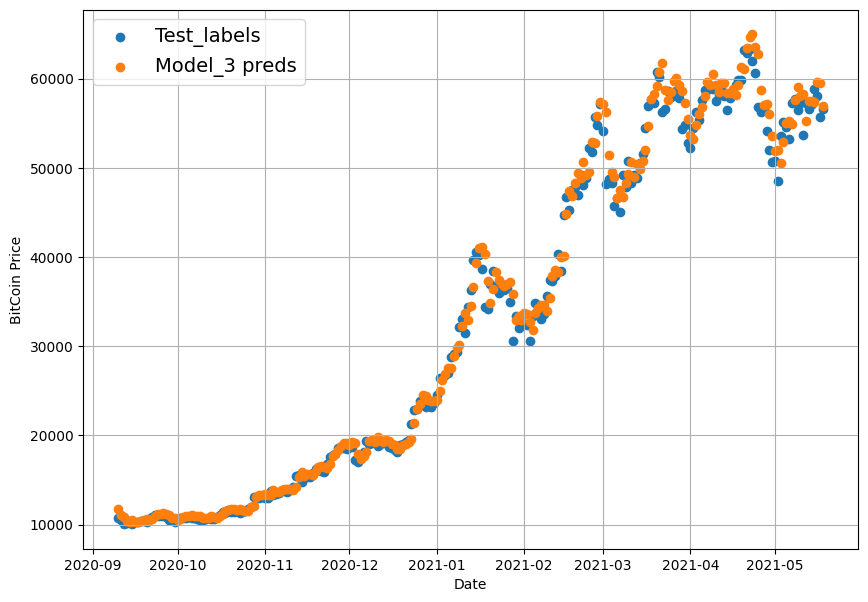

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_labels")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_3_preds[:, 0],
                 start=offset,
                 label="Model_3 preds")


## Which of our model performs the best so far?

In [ ]:
naive_results["mae"]

567.9802

<Axes: >

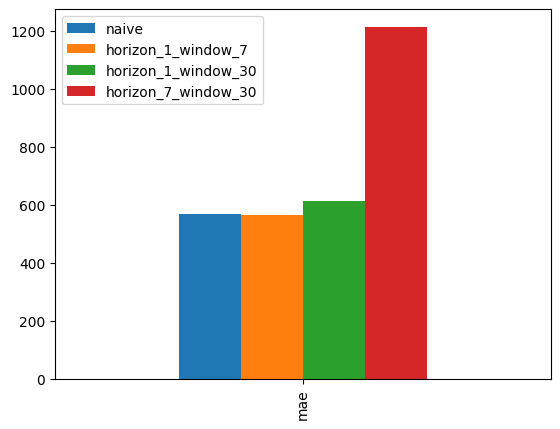

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(kind="bar")

## Model 4: Conv1D

In [ ]:
# Reset the value of horizon and window
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create window data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Create train test split
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

To use Conv1D layer we need an input shape of: ```(batch_size, timesteps, input_dim```

However our data isn't in that shape yet

In [ ]:
# Check the shape of the training data
train_windows[0].shape

(7,)

In [ ]:
# In order to pass our data to Conv1D layer, we need to reshape it
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # adding an extra dimension for the input

In [ ]:
# Test out our lambda layer
print(f"Original Shape: \n{x.shape}")
print(f"Expanded Shape: \n{expand_dims_layer(x).shape}")
print(f"Original values with expanded shape: \n{expand_dims_layer(x)}")

Original Shape: 
(7,)
Expanded Shape: 
(7, 1)
Original values with expanded shape: 
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
# Creating model 4

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, padding="causal", activation='relu'),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, padding="causal", activation='relu'),
    tf.keras.layers.Dense(units=HORIZON)
], name="model_4_Conv1D")

# Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
history_model_4 = model_4.fit(x=train_windows,
                              y=train_labels,
                              batch_size=128,
                              epochs=200,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_4.name)])

Epoch 1/200
17/18 [===========================>..] - ETA: 0s - loss: 1005.5464 - mae: 1005.5464

18/18 [==============================] - 4s 178ms/step - loss: 992.3711 - mae: 992.3711 - val_loss: 2411.4529 - val_mae: 2411.4529
Epoch 2/200
17/18 [===========================>..] - ETA: 0s - loss: 247.3201 - mae: 247.3201

18/18 [==============================] - 3s 145ms/step - loss: 246.1741 - mae: 246.1741 - val_loss: 1253.7963 - val_mae: 1253.7963
Epoch 3/200
17/18 [===========================>..] - ETA: 0s - loss: 194.3830 - mae: 194.3830

18/18 [==============================] - 3s 146ms/step - loss: 191.8122 - mae: 191.8122 - val_loss: 1057.6743 - val_mae: 1057.6743
Epoch 4/200
18/18 [==============================] - 2s 89ms/step - loss: 177.7394 - mae: 177.7394 - val_loss: 1162.6862 - val_mae: 1162.6862
Epoch 5/200
17/18 [===========================>..] - ETA: 0s - loss: 169.0630 - mae: 169.0630

18/18 [==============================] - 3s 170ms/step - loss: 170.2900 - mae: 170.2900 - val_loss: 887.2379 - val_mae: 887.2379
Epoch 6/200
18/18 [==============================] - 2s 103ms/step - loss: 159.0210 - mae: 159.0210 - val_loss: 1003.1170 - val_mae: 1003.1170
Epoch 7/200
17/18 [===========================>..] - ETA: 0s - loss: 154.0011 - mae: 154.0011

18/18 [==============================] - 3s 144ms/step - loss: 154.2894 - mae: 154.2894 - val_loss: 793.0297 - val_mae: 793.0297
Epoch 8/200
18/18 [==============================] - 2s 88ms/step - loss: 154.1575 - mae: 154.1575 - val_loss: 841.6367 - val_mae: 841.6367
Epoch 9/200
17/18 [===========================>..] - ETA: 0s - loss: 141.2305 - mae: 141.2305

18/18 [==============================] - 3s 143ms/step - loss: 141.4950 - mae: 141.4950 - val_loss: 746.3708 - val_mae: 746.3708
Epoch 10/200
17/18 [===========================>..] - ETA: 0s - loss: 140.5402 - mae: 140.5402

18/18 [==============================] - 3s 176ms/step - loss: 140.7508 - mae: 140.7508 - val_loss: 721.9522 - val_mae: 721.9522
Epoch 11/200
17/18 [===========================>..] - ETA: 0s - loss: 139.0791 - mae: 139.0791

18/18 [==============================] - 3s 172ms/step - loss: 138.8891 - mae: 138.8891 - val_loss: 684.3751 - val_mae: 684.3751
Epoch 12/200
17/18 [===========================>..] - ETA: 0s - loss: 133.7874 - mae: 133.7874

18/18 [==============================] - 3s 145ms/step - loss: 134.5512 - mae: 134.5512 - val_loss: 658.0473 - val_mae: 658.0473
Epoch 13/200
18/18 [==============================] - 2s 89ms/step - loss: 129.6367 - mae: 129.6367 - val_loss: 674.0415 - val_mae: 674.0415
Epoch 14/200
18/18 [==============================] - 2s 89ms/step - loss: 129.3191 - mae: 129.3191 - val_loss: 854.7390 - val_mae: 854.7390
Epoch 15/200
18/18 [==============================] - 2s 89ms/step - loss: 131.3279 - mae: 131.3279 - val_loss: 822.3273 - val_mae: 822.3273
Epoch 16/200
18/18 [==============================] - 2s 89ms/step - loss: 140.8958 - mae: 140.8958 - val_loss: 725.0430 - val_mae: 725.0430
Epoch 17/200
18/18 [==============================] - 2s 109ms/step - loss: 131.9157 - mae: 131.9157 - val_loss: 689.5238 - val_mae: 689.5238
Epoch 18/200
18/18 [==============================] - 2s 95ms/step - loss: 116.5571 - mae: 116.5571 - val_loss: 673.1957 - val_mae: 673.1957
Epoch 19/200
18/18 [====

18/18 [==============================] - 3s 145ms/step - loss: 125.9863 - mae: 125.9863 - val_loss: 641.6978 - val_mae: 641.6978
Epoch 22/200
17/18 [===========================>..] - ETA: 0s - loss: 123.1784 - mae: 123.1784

18/18 [==============================] - 3s 148ms/step - loss: 121.8518 - mae: 121.8518 - val_loss: 603.9817 - val_mae: 603.9817
Epoch 23/200
18/18 [==============================] - 2s 109ms/step - loss: 134.9452 - mae: 134.9452 - val_loss: 844.8668 - val_mae: 844.8668
Epoch 24/200
18/18 [==============================] - 2s 101ms/step - loss: 132.9056 - mae: 132.9056 - val_loss: 639.2177 - val_mae: 639.2177
Epoch 25/200
18/18 [==============================] - 2s 91ms/step - loss: 124.2479 - mae: 124.2479 - val_loss: 628.7173 - val_mae: 628.7173
Epoch 26/200
18/18 [==============================] - 2s 88ms/step - loss: 114.7820 - mae: 114.7820 - val_loss: 622.2206 - val_mae: 622.2206
Epoch 27/200
18/18 [==============================] - 2s 90ms/step - loss: 117.0916 - mae: 117.0916 - val_loss: 785.8466 - val_mae: 785.8466
Epoch 28/200
17/18 [===========================>..] - ETA: 0s - loss: 118.6472 - mae: 118.6472

18/18 [==============================] - 3s 146ms/step - loss: 119.4746 - mae: 119.4746 - val_loss: 590.0576 - val_mae: 590.0576
Epoch 29/200
18/18 [==============================] - 2s 89ms/step - loss: 112.5719 - mae: 112.5719 - val_loss: 713.7579 - val_mae: 713.7579
Epoch 30/200
18/18 [==============================] - 2s 109ms/step - loss: 121.4935 - mae: 121.4935 - val_loss: 650.3508 - val_mae: 650.3508
Epoch 31/200
17/18 [===========================>..] - ETA: 0s - loss: 112.2585 - mae: 112.2585

18/18 [==============================] - 3s 154ms/step - loss: 112.5713 - mae: 112.5713 - val_loss: 574.5687 - val_mae: 574.5687
Epoch 32/200
18/18 [==============================] - 2s 89ms/step - loss: 108.9201 - mae: 108.9201 - val_loss: 620.0649 - val_mae: 620.0649
Epoch 33/200
18/18 [==============================] - 2s 89ms/step - loss: 114.8275 - mae: 114.8275 - val_loss: 674.5699 - val_mae: 674.5699
Epoch 34/200
18/18 [==============================] - 2s 89ms/step - loss: 117.5537 - mae: 117.5537 - val_loss: 640.5411 - val_mae: 640.5411
Epoch 35/200
18/18 [==============================] - 2s 89ms/step - loss: 122.6090 - mae: 122.6090 - val_loss: 1073.7281 - val_mae: 1073.7281
Epoch 36/200
18/18 [==============================] - 2s 91ms/step - loss: 126.5546 - mae: 126.5546 - val_loss: 579.9489 - val_mae: 579.9489
Epoch 37/200
18/18 [==============================] - 2s 111ms/step - loss: 106.9330 - mae: 106.9330 - val_loss: 615.6749 - val_mae: 615.6749
Epoch 38/200
18/18 [==

18/18 [==============================] - 3s 145ms/step - loss: 110.6552 - mae: 110.6552 - val_loss: 566.8845 - val_mae: 566.8845
Epoch 41/200
18/18 [==============================] - 2s 90ms/step - loss: 107.3151 - mae: 107.3151 - val_loss: 649.3192 - val_mae: 649.3192
Epoch 42/200
18/18 [==============================] - 2s 89ms/step - loss: 122.8004 - mae: 122.8004 - val_loss: 726.0734 - val_mae: 726.0734
Epoch 43/200
18/18 [==============================] - 2s 93ms/step - loss: 112.3339 - mae: 112.3339 - val_loss: 572.9109 - val_mae: 572.9109
Epoch 44/200
18/18 [==============================] - 2s 115ms/step - loss: 113.5041 - mae: 113.5041 - val_loss: 936.3913 - val_mae: 936.3913
Epoch 45/200
18/18 [==============================] - 2s 89ms/step - loss: 124.2250 - mae: 124.2250 - val_loss: 702.0446 - val_mae: 702.0446
Epoch 46/200
18/18 [==============================] - 2s 89ms/step - loss: 126.7256 - mae: 126.7256 - val_loss: 575.5865 - val_mae: 575.5865
Epoch 47/200
18/18 [====

18/18 [==============================] - 3s 146ms/step - loss: 114.2762 - mae: 114.2762 - val_loss: 564.6674 - val_mae: 564.6674
Epoch 58/200
18/18 [==============================] - 2s 105ms/step - loss: 106.6325 - mae: 106.6325 - val_loss: 570.3642 - val_mae: 570.3642
Epoch 59/200
18/18 [==============================] - 2s 100ms/step - loss: 113.4712 - mae: 113.4712 - val_loss: 602.2407 - val_mae: 602.2407
Epoch 60/200
18/18 [==============================] - 2s 89ms/step - loss: 110.6402 - mae: 110.6402 - val_loss: 637.9154 - val_mae: 637.9154
Epoch 61/200
18/18 [==============================] - 2s 88ms/step - loss: 110.9084 - mae: 110.9084 - val_loss: 697.9625 - val_mae: 697.9625
Epoch 62/200
18/18 [==============================] - 2s 88ms/step - loss: 135.3627 - mae: 135.3627 - val_loss: 576.1978 - val_mae: 576.1978
Epoch 63/200
18/18 [==============================] - 2s 89ms/step - loss: 118.4222 - mae: 118.4222 - val_loss: 625.9738 - val_mae: 625.9738
Epoch 64/200
18/18 [===

18/18 [==============================] - 3s 148ms/step - loss: 104.3664 - mae: 104.3664 - val_loss: 564.3843 - val_mae: 564.3843
Epoch 174/200
18/18 [==============================] - 2s 91ms/step - loss: 106.3052 - mae: 106.3052 - val_loss: 607.8409 - val_mae: 607.8409
Epoch 175/200
18/18 [==============================] - 2s 89ms/step - loss: 115.7685 - mae: 115.7685 - val_loss: 711.2125 - val_mae: 711.2125
Epoch 176/200
18/18 [==============================] - 2s 106ms/step - loss: 109.7012 - mae: 109.7012 - val_loss: 651.2994 - val_mae: 651.2994
Epoch 177/200
18/18 [==============================] - 2s 105ms/step - loss: 128.3598 - mae: 128.3598 - val_loss: 885.1431 - val_mae: 885.1431
Epoch 178/200
18/18 [==============================] - 2s 88ms/step - loss: 112.4530 - mae: 112.4530 - val_loss: 594.8727 - val_mae: 594.8727
Epoch 179/200
18/18 [==============================] - 2s 89ms/step - loss: 110.3251 - mae: 110.3251 - val_loss: 571.5923 - val_mae: 571.5923
Epoch 180/200
18/

In [ ]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 256)            9216      
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 256)            327936    
                                                                 
 dense_6 (Dense)             (None, 1, 1)              257       
                                                                 
Total params: 337,409
Trainable params: 337,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 599.1917 - mae: 599.1917


[599.1917114257812, 599.1917114257812]

In [ ]:
# Load the best performing models
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_Conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 7ms/step - loss: 564.3843 - mae: 564.3843


[564.3843383789062, 564.3843383789062]

In [ ]:
# Make prediction on the test data
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8817.548, 8770.899, 9041.405, 8752.629, 8731.239, 8733.522,
       8660.437, 8507.505, 8446.608, 8521.86 ], dtype=float32)>

In [ ]:
# Evalutate the predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 564.38434,
 'mse': 1148959.1,
 'rmse': 1071.8951,
 'mape': 2.5252876,
 'mase': 0.99146694}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

## Model 5: RNN (LSTM)

In [ ]:
# Set the random seed
tf.random.set_seed(43)

inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = tf.keras.layers.LSTM(units=128, activation="relu", return_sequences=True)(x)
x = tf.keras.layers.LSTM(units=128, activation="relu")(x)
outputs = tf.keras.layers.Dense(units=HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_LSTM")

# Compile the model
model_5.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="mae")

# Fit the model
model_5_history = model_5.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              batch_size=32,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_5.name)])

Epoch 1/100
67/70 [===========================>..] - ETA: 0s - loss: 1139.6385 - mae: 1139.6385

70/70 [==============================] - 15s 129ms/step - loss: 1107.4711 - mae: 1107.4711 - val_loss: 1354.4283 - val_mae: 1354.4283
Epoch 2/100
67/70 [===========================>..] - ETA: 0s - loss: 187.4957 - mae: 187.4957

70/70 [==============================] - 8s 111ms/step - loss: 188.5619 - mae: 188.5619 - val_loss: 1173.5189 - val_mae: 1173.5189
Epoch 3/100
69/70 [============================>.] - ETA: 0s - loss: 196.4989 - mae: 196.4989

70/70 [==============================] - 9s 136ms/step - loss: 195.8098 - mae: 195.8098 - val_loss: 957.7894 - val_mae: 957.7894
Epoch 4/100
70/70 [==============================] - 1s 15ms/step - loss: 186.1410 - mae: 186.1410 - val_loss: 1380.5243 - val_mae: 1380.5243
Epoch 5/100
70/70 [==============================] - 1s 18ms/step - loss: 192.9909 - mae: 192.9909 - val_loss: 1134.4609 - val_mae: 1134.4609
Epoch 6/100
70/70 [==============================] - 1s 16ms/step - loss: 180.0242 - mae: 180.0242 - val_loss: 993.9780 - val_mae: 993.9780
Epoch 7/100
70/70 [==============================] - 1s 18ms/step - loss: 174.3055 - mae: 174.3055 - val_loss: 984.1865 - val_mae: 984.1865
Epoch 8/100
70/70 [==============================] - ETA: 0s - loss: 162.5091 - mae: 162.5091

70/70 [==============================] - 8s 112ms/step - loss: 162.5091 - mae: 162.5091 - val_loss: 810.4772 - val_mae: 810.4772
Epoch 9/100
67/70 [===========================>..] - ETA: 0s - loss: 153.6707 - mae: 153.6707

70/70 [==============================] - 10s 148ms/step - loss: 154.3377 - mae: 154.3377 - val_loss: 768.4438 - val_mae: 768.4438
Epoch 10/100
70/70 [==============================] - 1s 15ms/step - loss: 150.4274 - mae: 150.4274 - val_loss: 858.2430 - val_mae: 858.2430
Epoch 11/100
67/70 [===========================>..] - ETA: 0s - loss: 148.9089 - mae: 148.9089

70/70 [==============================] - 7s 100ms/step - loss: 148.5993 - mae: 148.5993 - val_loss: 750.8412 - val_mae: 750.8412
Epoch 12/100
70/70 [==============================] - 2s 22ms/step - loss: 137.5185 - mae: 137.5185 - val_loss: 787.1905 - val_mae: 787.1905
Epoch 13/100
69/70 [============================>.] - ETA: 0s - loss: 137.1229 - mae: 137.1229

70/70 [==============================] - 8s 119ms/step - loss: 137.2558 - mae: 137.2558 - val_loss: 687.7507 - val_mae: 687.7507
Epoch 14/100
70/70 [==============================] - 1s 15ms/step - loss: 133.0776 - mae: 133.0776 - val_loss: 1022.2249 - val_mae: 1022.2249
Epoch 15/100
69/70 [============================>.] - ETA: 0s - loss: 139.7475 - mae: 139.7475

70/70 [==============================] - 7s 105ms/step - loss: 139.2875 - mae: 139.2875 - val_loss: 662.3830 - val_mae: 662.3830
Epoch 16/100
67/70 [===========================>..] - ETA: 0s - loss: 128.7751 - mae: 128.7751

70/70 [==============================] - 7s 97ms/step - loss: 128.7772 - mae: 128.7772 - val_loss: 636.9660 - val_mae: 636.9660
Epoch 17/100
70/70 [==============================] - 1s 13ms/step - loss: 122.5021 - mae: 122.5021 - val_loss: 671.8571 - val_mae: 671.8571
Epoch 18/100
70/70 [==============================] - 1s 20ms/step - loss: 119.1140 - mae: 119.1140 - val_loss: 782.4424 - val_mae: 782.4424
Epoch 19/100
70/70 [==============================] - 2s 23ms/step - loss: 116.0728 - mae: 116.0728 - val_loss: 639.0977 - val_mae: 639.0977
Epoch 20/100
68/70 [============================>.] - ETA: 0s - loss: 118.1615 - mae: 118.1615

70/70 [==============================] - 8s 113ms/step - loss: 117.3650 - mae: 117.3650 - val_loss: 600.2174 - val_mae: 600.2174
Epoch 21/100
68/70 [============================>.] - ETA: 0s - loss: 115.2634 - mae: 115.2634

70/70 [==============================] - 8s 121ms/step - loss: 114.4052 - mae: 114.4052 - val_loss: 594.8177 - val_mae: 594.8177
Epoch 22/100
70/70 [==============================] - 1s 18ms/step - loss: 114.5106 - mae: 114.5106 - val_loss: 639.3036 - val_mae: 639.3036
Epoch 23/100
70/70 [==============================] - 1s 20ms/step - loss: 123.5534 - mae: 123.5534 - val_loss: 608.0207 - val_mae: 608.0207
Epoch 24/100
70/70 [==============================] - 1s 18ms/step - loss: 114.0366 - mae: 114.0366 - val_loss: 612.8165 - val_mae: 612.8165
Epoch 25/100
68/70 [============================>.] - ETA: 0s - loss: 123.6698 - mae: 123.6698

70/70 [==============================] - 11s 156ms/step - loss: 122.2854 - mae: 122.2854 - val_loss: 590.0002 - val_mae: 590.0002
Epoch 26/100
70/70 [==============================] - 1s 18ms/step - loss: 115.4425 - mae: 115.4425 - val_loss: 612.2292 - val_mae: 612.2292
Epoch 27/100
70/70 [==============================] - 1s 18ms/step - loss: 120.5009 - mae: 120.5009 - val_loss: 599.4130 - val_mae: 599.4130
Epoch 28/100
70/70 [==============================] - 1s 18ms/step - loss: 115.0371 - mae: 115.0371 - val_loss: 669.0744 - val_mae: 669.0744
Epoch 29/100
70/70 [==============================] - ETA: 0s - loss: 117.2703 - mae: 117.2703

70/70 [==============================] - 10s 145ms/step - loss: 117.2703 - mae: 117.2703 - val_loss: 584.6581 - val_mae: 584.6581
Epoch 30/100
68/70 [============================>.] - ETA: 0s - loss: 122.1319 - mae: 122.1319

70/70 [==============================] - 4s 63ms/step - loss: 122.8646 - mae: 122.8646 - val_loss: 582.1105 - val_mae: 582.1105
Epoch 31/100
67/70 [===========================>..] - ETA: 0s - loss: 119.5272 - mae: 119.5272

70/70 [==============================] - 10s 143ms/step - loss: 119.7058 - mae: 119.7058 - val_loss: 581.5928 - val_mae: 581.5928
Epoch 32/100
70/70 [==============================] - 1s 14ms/step - loss: 117.3641 - mae: 117.3641 - val_loss: 892.2543 - val_mae: 892.2543
Epoch 33/100
68/70 [============================>.] - ETA: 0s - loss: 121.5872 - mae: 121.5872

70/70 [==============================] - 6s 93ms/step - loss: 120.7678 - mae: 120.7678 - val_loss: 579.1091 - val_mae: 579.1091
Epoch 34/100
70/70 [==============================] - 1s 9ms/step - loss: 124.8973 - mae: 124.8973 - val_loss: 816.5533 - val_mae: 816.5533
Epoch 35/100
70/70 [==============================] - 1s 9ms/step - loss: 117.2952 - mae: 117.2952 - val_loss: 627.3121 - val_mae: 627.3121
Epoch 36/100
70/70 [==============================] - 1s 9ms/step - loss: 115.8510 - mae: 115.8510 - val_loss: 665.3533 - val_mae: 665.3533
Epoch 37/100
69/70 [============================>.] - ETA: 0s - loss: 118.3540 - mae: 118.3540

70/70 [==============================] - 5s 76ms/step - loss: 119.5440 - mae: 119.5440 - val_loss: 578.6754 - val_mae: 578.6754
Epoch 38/100
70/70 [==============================] - 1s 14ms/step - loss: 124.6121 - mae: 124.6121 - val_loss: 682.3386 - val_mae: 682.3386
Epoch 39/100
70/70 [==============================] - 1s 17ms/step - loss: 115.1801 - mae: 115.1801 - val_loss: 941.7883 - val_mae: 941.7883
Epoch 40/100
70/70 [==============================] - 1s 18ms/step - loss: 116.1262 - mae: 116.1262 - val_loss: 625.4675 - val_mae: 625.4675
Epoch 41/100
70/70 [==============================] - 1s 15ms/step - loss: 112.8729 - mae: 112.8729 - val_loss: 686.6077 - val_mae: 686.6077
Epoch 42/100
70/70 [==============================] - 1s 15ms/step - loss: 110.5822 - mae: 110.5822 - val_loss: 588.2981 - val_mae: 588.2981
Epoch 43/100
70/70 [==============================] - 1s 10ms/step - loss: 114.1463 - mae: 114.1463 - val_loss: 643.9406 - val_mae: 643.9406
Epoch 44/100
69/70 [======

70/70 [==============================] - 4s 64ms/step - loss: 115.4867 - mae: 115.4867 - val_loss: 570.5850 - val_mae: 570.5850
Epoch 45/100
70/70 [==============================] - 1s 9ms/step - loss: 117.8452 - mae: 117.8452 - val_loss: 584.4470 - val_mae: 584.4470
Epoch 46/100
70/70 [==============================] - 1s 10ms/step - loss: 113.5945 - mae: 113.5945 - val_loss: 577.7763 - val_mae: 577.7763
Epoch 47/100
70/70 [==============================] - 1s 9ms/step - loss: 126.1774 - mae: 126.1774 - val_loss: 763.7510 - val_mae: 763.7510
Epoch 48/100
70/70 [==============================] - 1s 10ms/step - loss: 116.5535 - mae: 116.5535 - val_loss: 571.8336 - val_mae: 571.8336
Epoch 49/100
70/70 [==============================] - 1s 10ms/step - loss: 125.6295 - mae: 125.6295 - val_loss: 674.2321 - val_mae: 674.2321
Epoch 50/100
70/70 [==============================] - 1s 10ms/step - loss: 116.4488 - mae: 116.4488 - val_loss: 571.0449 - val_mae: 571.0449
Epoch 51/100
70/70 [========

70/70 [==============================] - 10s 149ms/step - loss: 109.6609 - mae: 109.6609 - val_loss: 570.5117 - val_mae: 570.5117
Epoch 55/100
69/70 [============================>.] - ETA: 0s - loss: 114.6208 - mae: 114.6208

70/70 [==============================] - 9s 130ms/step - loss: 114.2172 - mae: 114.2172 - val_loss: 570.0670 - val_mae: 570.0670
Epoch 56/100
70/70 [==============================] - 1s 10ms/step - loss: 116.9339 - mae: 116.9339 - val_loss: 620.3922 - val_mae: 620.3922
Epoch 57/100
70/70 [==============================] - 1s 9ms/step - loss: 116.1790 - mae: 116.1790 - val_loss: 710.2162 - val_mae: 710.2162
Epoch 58/100
70/70 [==============================] - 1s 10ms/step - loss: 117.7103 - mae: 117.7103 - val_loss: 589.1874 - val_mae: 589.1874
Epoch 59/100
70/70 [==============================] - 1s 9ms/step - loss: 112.2850 - mae: 112.2850 - val_loss: 572.6182 - val_mae: 572.6182
Epoch 60/100
70/70 [==============================] - 1s 12ms/step - loss: 110.9323 - mae: 110.9323 - val_loss: 582.4761 - val_mae: 582.4761
Epoch 61/100
70/70 [==============================] - 1s 21ms/step - loss: 117.6986 - mae: 117.6986 - val_loss: 611.8022 - val_mae: 611.8022
Epoch 62/100
70/70 [=======

70/70 [==============================] - 12s 174ms/step - loss: 111.0611 - mae: 111.0611 - val_loss: 567.8669 - val_mae: 567.8669
Epoch 77/100
70/70 [==============================] - 1s 20ms/step - loss: 118.2098 - mae: 118.2098 - val_loss: 618.6678 - val_mae: 618.6678
Epoch 78/100
70/70 [==============================] - 1s 16ms/step - loss: 113.9267 - mae: 113.9267 - val_loss: 608.4843 - val_mae: 608.4843
Epoch 79/100
70/70 [==============================] - 1s 18ms/step - loss: 112.1408 - mae: 112.1408 - val_loss: 651.6718 - val_mae: 651.6718
Epoch 80/100
70/70 [==============================] - 1s 17ms/step - loss: 116.9464 - mae: 116.9464 - val_loss: 601.4982 - val_mae: 601.4982
Epoch 81/100
70/70 [==============================] - 1s 17ms/step - loss: 107.6625 - mae: 107.6625 - val_loss: 691.0533 - val_mae: 691.0533
Epoch 82/100
70/70 [==============================] - 1s 17ms/step - loss: 108.1340 - mae: 108.1340 - val_loss: 568.3674 - val_mae: 568.3674
Epoch 83/100
70/70 [====

In [ ]:
# Evaluate the model
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 586.4100 - mae: 586.4100


[586.4100341796875, 586.4100341796875]

In [ ]:
# Load the best performing model
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 567.8669 - mae: 567.8669


[567.8668823242188, 567.8668823242188]

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8864.366, 8783.753, 9051.006, 8779.445, 8738.499, 8765.976,
       8690.298, 8511.73 , 8481.874, 8535.231], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 567.8669,
 'mse': 1162640.9,
 'rmse': 1078.2583,
 'mape': 2.5508924,
 'mase': 0.9975848}

In [ ]:
naive_results


{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

## Make a multi-variate time series

TK (image) - image of multivariate time series

TK (image) - image of multivariate time series

So far all of our models have barely kept up with the naïve forecast.
And so far all of them have been trained on a single variable (also called univariate time series): the historical price of Bitcoin.

If predicting the price of Bitcoin using the price of Bitcoin hasn't worked out very well, maybe giving our model more information may help.

More information is a vague term because we could actually feed almost anything to our model(s) and they would still try to find patterns.

For example, we could use the historical price of Bitcoin as well as anyone with the name Daniel Bourke Tweeted (https://twitter.com/mrdbourke) on that day to predict the future price of Bitcoin.



In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020
# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [ ]:
# Create a date range of where specific block reward value should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [ ]:
# Adding a block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Adding block reward value to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days: block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

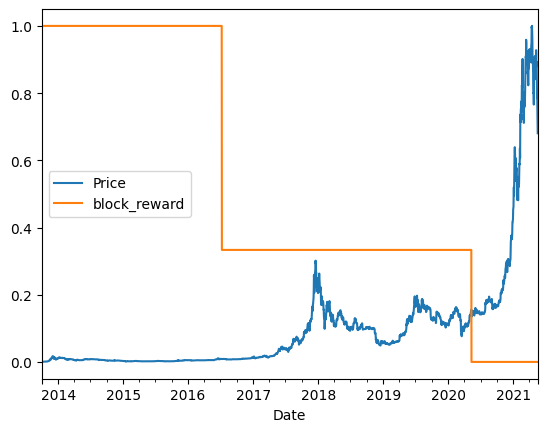

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot()

In [ ]:
# Set up dataset hyperparameter
WINDOW_SIZE = 7
HORIZON = 1

In [ ]:
# Make a copy of bitcoin historical data
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from pandas dataframe

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [ ]:
# Create X window and y horizon features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Split the dataset
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

## Model 6: Dense

In [ ]:
# Creating a model same as model_0

# Set the random seed
tf.random.set_seed(43)

model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=HORIZON)
], name="model_6_dense")

# Compile the model
model_6.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
history_model_6 = model_6.fit(X_train, y_train,
                              epochs=100,
                              batch_size=128,
                              validation_data=(X_test, y_test),
                              callbacks=[create_model_checkpoint(model_6.name)])

Epoch 1/100
 9/18 [==============>...............] - ETA: 0s - loss: 1310.8921 - mae: 1310.8921 

18/18 [==============================] - 2s 84ms/step - loss: 939.5421 - mae: 939.5421 - val_loss: 2481.8406 - val_mae: 2481.8406
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 287.0651 - mae: 287.0651

18/18 [==============================] - 1s 59ms/step - loss: 267.4436 - mae: 267.4436 - val_loss: 1396.8707 - val_mae: 1396.8707
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 196.4778 - mae: 196.4778

18/18 [==============================] - 1s 46ms/step - loss: 193.7776 - mae: 193.7776 - val_loss: 1040.8746 - val_mae: 1040.8746
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 152.2069 - mae: 152.2069

18/18 [==============================] - 1s 46ms/step - loss: 152.2069 - mae: 152.2069 - val_loss: 770.4625 - val_mae: 770.4625
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 131.5359 - mae: 131.5359

18/18 [==============================] - 1s 48ms/step - loss: 131.5359 - mae: 131.5359 - val_loss: 699.5888 - val_mae: 699.5888
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 124.6750 - mae: 124.6750 - val_loss: 729.2095 - val_mae: 729.2095
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 125.6496 - mae: 125.6496 - val_loss: 711.4555 - val_mae: 711.4555
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 125.7740 - mae: 125.7740

18/18 [==============================] - 1s 47ms/step - loss: 125.1711 - mae: 125.1711 - val_loss: 661.8282 - val_mae: 661.8282
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 119.7381 - mae: 119.7381

18/18 [==============================] - 1s 46ms/step - loss: 116.7271 - mae: 116.7271 - val_loss: 614.8328 - val_mae: 614.8328
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6960 - mae: 112.6960 - val_loss: 650.0139 - val_mae: 650.0139
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 115.9343 - mae: 115.9343 - val_loss: 639.2930 - val_mae: 639.2930
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 116.7674 - mae: 116.7674

18/18 [==============================] - 1s 46ms/step - loss: 116.7674 - mae: 116.7674 - val_loss: 591.9619 - val_mae: 591.9619
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8332 - mae: 113.8332 - val_loss: 670.6786 - val_mae: 670.6786
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 119.2935 - mae: 119.2935 - val_loss: 599.8873 - val_mae: 599.8873
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4612 - mae: 112.4612 - val_loss: 595.0442 - val_mae: 595.0442
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 110.6239 - mae: 110.6239 - val_loss: 727.6147 - val_mae: 727.6147
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 150.1964 - mae: 150.1964

18/18 [==============================] - 1s 69ms/step - loss: 125.8023 - mae: 125.8023 - val_loss: 584.9474 - val_mae: 584.9474
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 112.9355 - mae: 112.9355 - val_loss: 657.5978 - val_mae: 657.5978
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 111.6838 - mae: 111.6838 - val_loss: 591.2209 - val_mae: 591.2209
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 106.4411 - mae: 106.4411 - val_loss: 634.2300 - val_mae: 634.2300
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 108.9427 - mae: 108.9427

18/18 [==============================] - 1s 46ms/step - loss: 108.9427 - mae: 108.9427 - val_loss: 574.6975 - val_mae: 574.6975
Epoch 22/100
18/18 [==============================] - 0s 7ms/step - loss: 109.5415 - mae: 109.5415 - val_loss: 575.1705 - val_mae: 575.1705
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 118.7793 - mae: 118.7793 - val_loss: 665.7403 - val_mae: 665.7403
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 148.2173 - mae: 148.2173

18/18 [==============================] - 1s 46ms/step - loss: 109.2789 - mae: 109.2789 - val_loss: 573.8990 - val_mae: 573.8990
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 105.1847 - mae: 105.1847 - val_loss: 709.8307 - val_mae: 709.8307
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6782 - mae: 113.6782 - val_loss: 614.7445 - val_mae: 614.7445
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3032 - mae: 110.3032 - val_loss: 601.4794 - val_mae: 601.4794
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 105.2047 - mae: 105.2047 - val_loss: 599.3058 - val_mae: 599.3058
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4454 - mae: 108.4454 - val_loss: 627.2841 - val_mae: 627.2841
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 117.7006 - mae: 117.7006 - val_loss: 693.8039 - val_mae: 693.8039
Epoch 31/100
18/18 [============

18/18 [==============================] - 1s 57ms/step - loss: 115.8515 - mae: 115.8515 - val_loss: 573.0203 - val_mae: 573.0203
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 118.1497 - mae: 118.1497 - val_loss: 784.8217 - val_mae: 784.8217
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 109.2023 - mae: 109.2023 - val_loss: 737.8015 - val_mae: 737.8015
Epoch 48/100
18/18 [==============================] - ETA: 0s - loss: 112.8160 - mae: 112.8160

18/18 [==============================] - 1s 46ms/step - loss: 112.8160 - mae: 112.8160 - val_loss: 571.9180 - val_mae: 571.9180
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 106.1833 - mae: 106.1833 - val_loss: 572.5699 - val_mae: 572.5699
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9033 - mae: 107.9033 - val_loss: 629.8882 - val_mae: 629.8882
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 108.2286 - mae: 108.2286 - val_loss: 603.4563 - val_mae: 603.4563
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 116.9811 - mae: 116.9811 - val_loss: 574.2755 - val_mae: 574.2755
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4129 - mae: 109.4129 - val_loss: 612.3361 - val_mae: 612.3361
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0415 - mae: 109.0415 - val_loss: 606.8765 - val_mae: 606.8765
Epoch 55/100
18/18 [============

18/18 [==============================] - 1s 46ms/step - loss: 106.3705 - mae: 106.3705 - val_loss: 571.0254 - val_mae: 571.0254
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8726 - mae: 112.8726 - val_loss: 591.0129 - val_mae: 591.0129
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 109.2028 - mae: 109.2028 - val_loss: 607.8755 - val_mae: 607.8755
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 111.9800 - mae: 111.9800 - val_loss: 601.9285 - val_mae: 601.9285
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 119.3146 - mae: 119.3146 - val_loss: 709.8250 - val_mae: 709.8250
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 117.8791 - mae: 117.8791 - val_loss: 573.7926 - val_mae: 573.7926
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 109.5818 - mae: 109.5818 - val_loss: 589.9340 - val_mae: 589.9340
Epoch 83/100
18/18 [============

In [ ]:
# Evaluate the model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 572.8839 - mae: 572.8839


[572.8839111328125, 572.8839111328125]

In [ ]:
# Load the best performing mdle
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 571.0254 - mae: 571.0254


[571.025390625, 571.025390625]

In [ ]:
# Make predictions
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8805.226 , 8776.206 , 9047.338 , 8733.364 , 8730.301 , 8720.259 ,
       8659.8955, 8515.368 , 8433.103 , 8527.503 ], dtype=float32)>

In [ ]:
# Evaluate model
model_6_results = evaluate_preds(y_test,
                                 model_6_preds)
model_6_results

{'mae': 571.02545,
 'mse': 1162616.0,
 'rmse': 1078.2467,
 'mape': 2.589755,
 'mase': 1.0031335}

In [ ]:
model_1_results

{'mae': 566.50433,
 'mse': 1158366.1,
 'rmse': 1076.2742,
 'mape': 2.5341477,
 'mase': 0.9951912}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

## Model 7: N-BEATES Algorithm



### Building and testing N-BEATES block layer

Because the N-BEATES layers doesn't exist in tensorflow, we have to create it.

To create custom layers and models in tensorflow we can use subclassing

In [ ]:
# Create n_beates custom layers
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has relu activation
    self.hidden = [tf.keras.layers.Dense(units=n_neurons, activation='relu') for _ in range(n_layers)]

    # Outputs of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(units=theta_size, activation='relu', name='theta')

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test our N-BEATS class.

to do we'll make some dummpy inuts and outputs


In [ ]:
# Setup dummpy n_beate_block layer inuts and output
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE + HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create a dummy inputs

# Inputs shape to the model has to reflect dense layer input requirements (n_dims = 2)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass the dummy inputs to the dummy nbeats_block
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

# These are the activations outputs of theta layers (they well be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())} \nForecast: {tf.squeeze(backcast.numpy())}")

Backcast: [0.         0.3758757  0.         0.         0.         0.23363945
 0.        ] 
Forecast: [0.         0.3758757  0.         0.         0.         0.23363945
 0.        ]


### Preparing data for N-Beates Algorithm using tf.data

In [ ]:
# Set the window and horizon size
WINDOW_SIZE = 7
HORIZON = 1

In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test split
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to make our dataset performant using tf.data
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features and labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

## Setting up hyperparameters for N-BEATES

In [ ]:
N_EPOCH = 5000
N_NEURONS = 12
N_STACK = 30
N_LAYERS = 4

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATES model, we need two layers for residual connections (substract and add)

The N-BEATES Algorithms uses Residual stacking to help train its deeper architecture.

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Substract
substracted = tf.keras.layers.subtract([tensor_1, tensor_2])

# Add
added = tf.keras.layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input Tensors: {tensor_1.numpy()} and {tensor_2.numpy()}")
print(f"Substracted: {substracted.numpy()}")
print(f"Added: {added.numpy()}")

Input Tensors: [10 11 12 13 14 15 16 17 18 19] and [0 1 2 3 4 5 6 7 8 9]
Substracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


## Building, Compiling and Fitting the nbeats algorithms

Okay, we've finally got all of the pieces of the puzzle ready for building and training the N-BEATS algorithm.

We'll do so by going through the following:
1. Setup an instance of the N-BEATS block layer using NBeatsBlock (this'll be the initial block used for the
network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API
(https://www.tensorflow.org/guide/keras/functional) for this)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use a for loop to create stacks of block layers
5. Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and
block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using tf.keras.Model()
(https://www.tensorflow.org/api_docs/python/tf/keras/Model)
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with
our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper
(https://arxiv.org/pdf/1905.10437.pdf))
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of
callbacks:
  * tf.keras.callbacks.EarlyStopping()
  (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) - stop the model from
  training if it doesn't improve validation loss for 200 epochs and restore the best performing weights
  using restore_best_weights=True (this'll prevent the model from training for loooongggggg period
  of time without improvement)
  * tf.keras.callbacks.ReduceLROnPlateau()
  (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau) - if the model's
  validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make
  incremental improvements (the smaller the learning rate, the smaller updates a model tries to make)

Woah. A bunch of steps. But I'm sure you're up to it.
Let's do it!

In [ ]:
%%time

# Set the random seed
tf.keras.utils.set_random_seed(43)

# 1. Set up an instance of NBeats
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forcast input (backward prediction + horizon prediction)
residuals, forcast = nbeats_block_layer(stack_input)

# 4. Create Stack of Block layers
for i, _ in enumerate(range(N_STACK - 1)):

  # 5. Use the nbeats to calculate the backcast and forcast
  backcast, block_forcast = NBeatsBlock(input_size=INPUT_SIZE,
                                        theta_size=THETA_SIZE,
                                        horizon=HORIZON,
                                        n_neurons=N_NEURONS,
                                        n_layers=N_LAYERS,
                                        name=f"NBeatsBlock_{i}")(residuals) # Pass the residuals
  # 6. Create the double residual stacking
  residuals = tf.keras.layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forcast = tf.keras.layers.add([forcast, block_forcast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forcast, name="model_7_nbeats")

# 8. Compile the model
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="mae")

# 9. Fit the model
history_model_7 = model_7.fit(train_dataset,
                              epochs=N_EPOCH,
                              validation_data=test_dataset,
                              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                          patience=200,
                                                                          restore_best_weights=True),
                                         tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                              patience=100,
                                                                              verbose=1)])

Epoch 1/5000
3/3 [==============================] - 37s 1s/step - loss: 2749.5857 - mae: 2749.5857 - val_loss: 16530.4824 - val_mae: 16530.4824 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 100ms/step - loss: 2483.7949 - mae: 2483.7949 - val_loss: 14357.2246 - val_mae: 14357.2246 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 101ms/step - loss: 2056.5723 - mae: 2056.5723 - val_loss: 10573.0068 - val_mae: 10573.0068 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 101ms/step - loss: 1315.3331 - mae: 1315.3331 - val_loss: 4149.3179 - val_mae: 4149.3179 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 106ms/step - loss: 315.7665 - mae: 315.7665 - val_loss: 2760.2153 - val_mae: 2760.2153 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 0s 72ms/step - loss: 527.6652 - mae: 527.6652 - val_loss: 1413.1825 - val_mae: 1413.1825 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 0s 44ms

In [ ]:
# Evaluates the nbeats model
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 26ms/step - loss: 585.4514 - mae: 585.4514


[585.4513549804688, 585.4513549804688]

In [ ]:
# Make prediction on the test dataset
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8858.338, 8791.006, 9061.698, 8653.512, 8687.947, 8783.078,
       8705.832, 8453.906, 8491.564, 8532.409], dtype=float32)>

In [ ]:
# Evaluates the nbeats model
model_7_results = evaluate_preds(y_true=y_test,
                                y_pred=model_7_preds)
model_7_results

{'mae': 585.45135,
 'mse': 1204557.6,
 'rmse': 1097.5234,
 'mape': 2.657467,
 'mase': 1.0284759}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

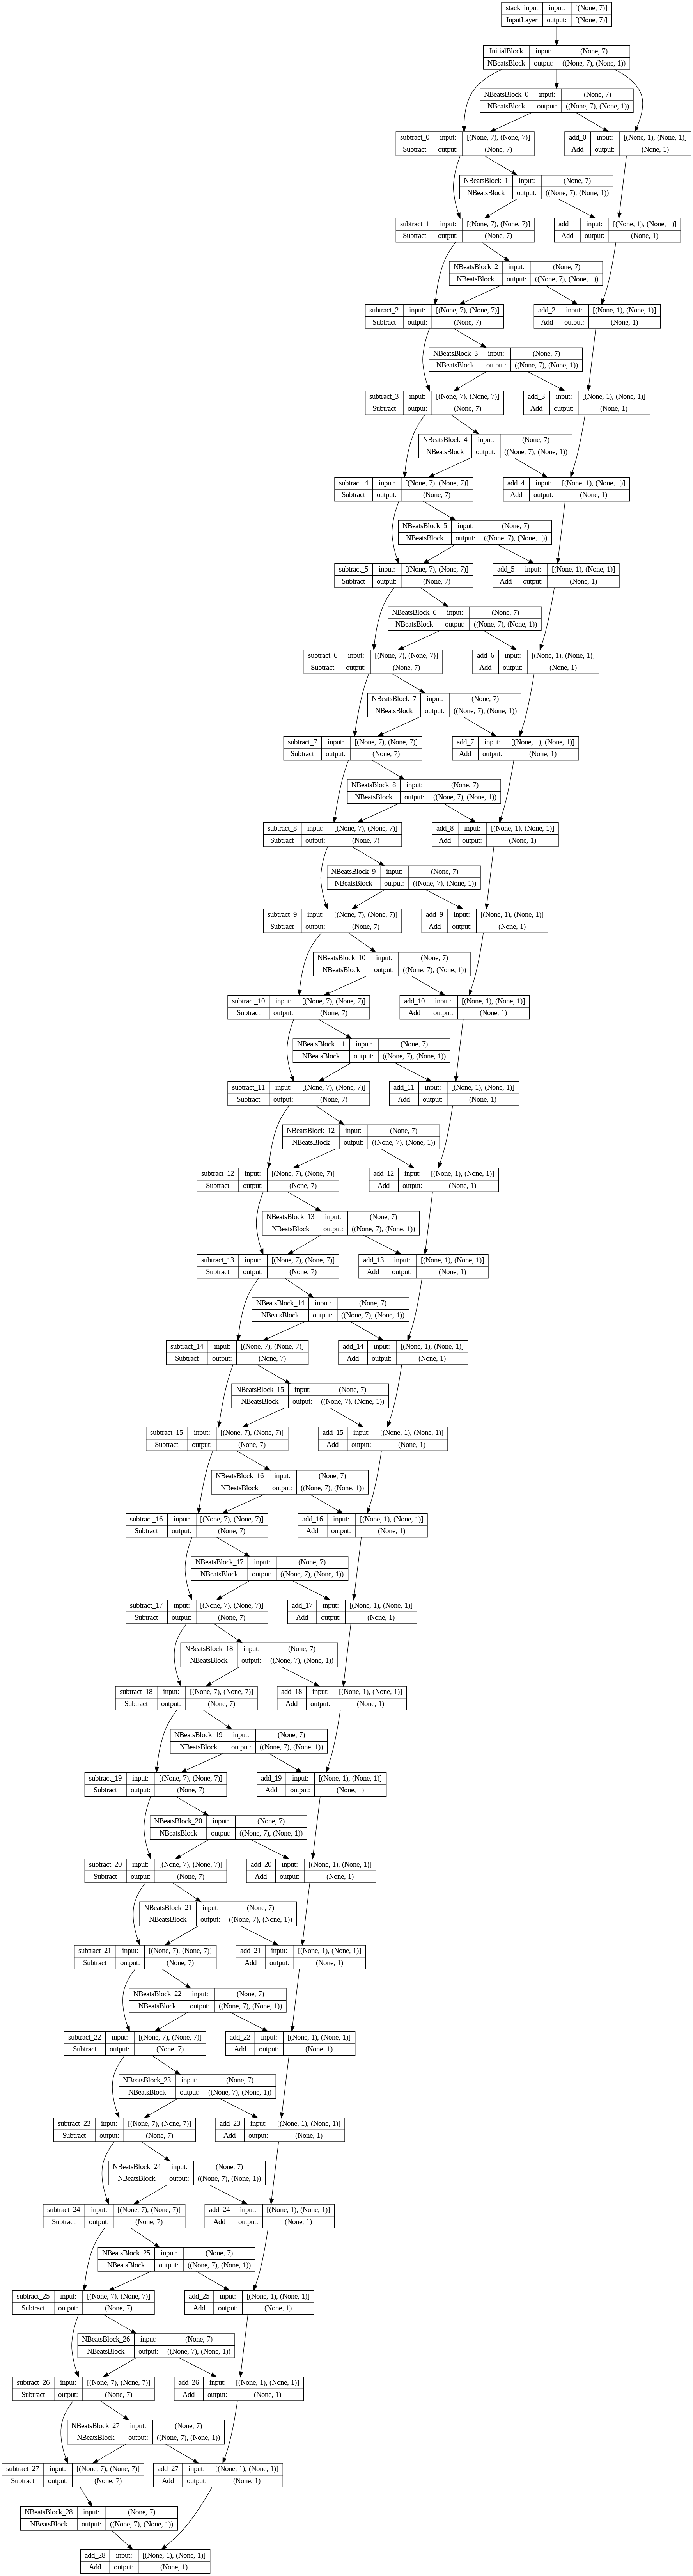

In [ ]:
tf.keras.utils.plot_model(model_7, show_shapes=True)

## Model 8: Creating an Ensemble Model (Stacking different models together)

An ensemble levarages the wisdom of crowd effect.

It combines many *different* models to predict a common goals

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an Ensemble of models (using different loss functions)

In [ ]:
def get_ensemble_model(horizon=HORIZON,
                       train_data=train_dataset,
                       test_data=test_dataset,
                       num_iter=10,
                       num_epochs=1000,
                       loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on mae, mse, mape.

  For example: if num_iter=10, a list of 30 trained models will be returned
  10 * len([mae, mse, mape])
  """

  # Make an empty list of models
  ensemble_models = []

  # Create num_iter number of models per loss functions
  for i in  range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.models.Sequential([
          # Initialize dense layer with normal distribution
          tf.keras.layers.Dense(units=128, kernel_initializer="he_normal", activation='relu'),
          tf.keras.layers.Dense(units=128, kernel_initializer="he_normal", activation='relu'),
          tf.keras.layers.Dense(units=HORIZON)
      ])

      # Compile the model
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit the model
      model.fit(train_data,
                epochs=num_epochs,
                validation_data=test_data,
                verbose=0,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time
ensemble_model = get_ensemble_model(num_iter=5,
                                    num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number 0
Optimizing model by reducing: mse for 1000 epochs, model number 0

Epoch 507: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 607: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number 0

Epoch 327: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 441: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 541: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number 1

Epoch 757: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 857: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number 1

Epoch 688: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 793: ReduceLROnPlateau

### Making prediction on Ensemble model

In [ ]:
# Create a function which uses a list of trained models to make and return a list of prediction

def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    model_pred = model.predict(data)
    ensemble_preds.append(model_pred)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_model, data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 58ms/step
CPU times: user 822 ms, sys: 31.2 ms, total: 853 ms
Wall time: 883 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8796.256,  8804.435,  9072.722, ..., 49633.523, 47753.992,
        45224.66 ],
       [ 8802.11 ,  8746.603,  9011.255, ..., 49946.51 , 48618.92 ,
        46840.504],
       [ 8777.187,  8817.913,  9039.967, ..., 49999.08 , 48414.28 ,
        46102.254],
       ...,
       [ 8836.103,  8822.943,  9020.044, ..., 50510.117, 49067.184,
        46157.46 ],
       [ 8740.278,  8711.439,  9039.537, ..., 49438.836, 48244.5  ,
        46199.473],
       [ 8797.457,  8746.004,  9089.393, ..., 49933.57 , 48191.516,
        46378.85 ]], dtype=float32)>

In [ ]:
# Evaluate ensemble model
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8788.193, 8777.382, 9058.812, 8712.463, 8742.541, 8729.194,
       8651.232, 8490.59 , 8450.905, 8522.128], dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8796.256, 8781.259, 9053.103, 8720.841, 8754.927, 8740.138,
       8649.447, 8485.365, 8462.006, 8531.355], dtype=float32)

In [ ]:
# Evaluate the ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 566.1431,
 'mse': 1137667.6,
 'rmse': 1066.615,
 'mape': 2.5621555,
 'mase': 0.99455667}

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 567.6215,
 'mse': 1139082.9,
 'rmse': 1067.2782,
 'mape': 2.5729592,
 'mase': 0.9971538}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

Right now all of our model's (prior to the ensemble model) are predicting single points.

Meaning, given a set of `WINDOW_SIZE=7` values, the model will predict `HORIZION=1`.

But what might be more helpful than a single value?

Perhaps a range of values?

For example, if a model is predicting the price of Bitcoin to be 50,000USD tomorrow, would it be helpful to know it's predicting the 50,000USD because it's predicting the price to be between 48,000 and 52,000USD? (note: "$" has been omitted from the previous sentence due to formatting issues)

Knowing the range of values a model is predicting may help you make better decisions for your forecasts.

You'd know that although the model is predicting 50,000USD (a **point prediction**, or single value in time), the value could actually be within the range 48,000USD to 52,000USD (of course, the value could also be *outside* of this range as well, but we'll get to that later).

These kind of prediction ranges are called **prediction intervals** or **uncertainty estimates**. And they're often as important as the forecast itself.

One way of getting the 95% condfidnece prediction intervals for a deep learning model is the bootstrap method:

  1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble model)
  2. Measure the standard deviation of the predictions
  3. Multiply standard deviation by 1.96 (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, this is why we initialized our neural networks with a normal distribution)
  4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

Wonderful, now we've got the upper and lower bounds for the the 95% prediction interval, let's plot them against our ensemble model's predictions.

To do so, we can use our plotting function as well as the matplotlib.pyplot.fill_between() method to shade in the space between the upper and lower bounds.

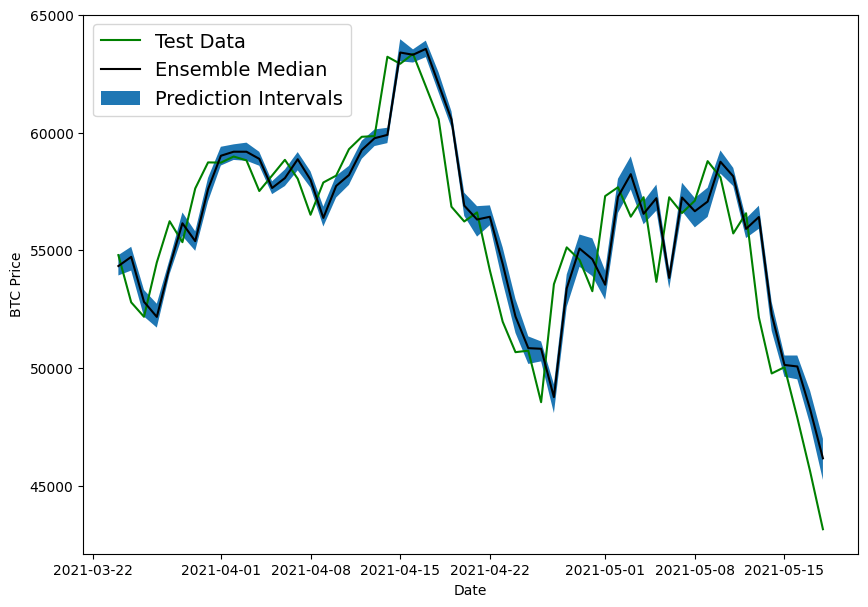

In [ ]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

We've just plotted:
* The test data (the ground truth Bitcoin prices)
* The median of the ensemble predictions
* The 95% prediction intervals (assuming the data is Gaussian/normal, the model is saying that 95% of the time, predicted value should fall between this range)

What can you tell about the ensemble model from the plot above?

It looks like the ensemble predictions are lagging slightly behind the actual data.

And the prediction intervals are fairly low throughout.

The combination of lagging predictions as well as low prediction intervals indicates that our ensemble model may be **overfitting** the data, meaning it's basically replicating what a naïve model would do and just predicting the previous timestep value for the next value.

This would explain why previous attempts to beat the naïve forecast have been futile.

We can test this hypothesis of overfitting by creating a model to make predictions into the future and seeing what they look like.

> 🔑 **Note:** Our prediction intervals assume that the data we're using come from a Gaussian/normal distribution (also called a bell curve), however, open systems rarely follow the Gaussian. We'll see this later on with the turkey problem 🦃. For further reading on this topic, I'd recommend reading [*The Black Swan* by Nassim Nicholas Taleb](https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable), especially Part 2 and Chapter 15.

## Aside: two types of uncertainty (coconut and subway)

Inheritly, you know you cannot predict the future.

That doesn't mean trying to isn't valuable.

For many things, future predictions are helpful. Such as knowing the bus you're trying to catch to the library leaves at 10:08am. The time 10:08am is a **point prediction**, if the bus left at a random time every day, how helpful would it be?

Just like saying the price of Bitcoin tomorrow will be 50,000USD is a point prediction.

However, as we've discussed knowing a **prediction interval** or **uncertainty estimate** can be as helpful or even more helpful than a point prediction itself.

Uncertainty estimates seek out to qualitatively and quantitatively answer the questions:
* What can my model know? (with perfect data, what's possible to learn?)
* What doesn't my model know? (what can a model never predict?)

There are two types of uncertainty in machine learning you should be aware of:

* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced, it is also referred to as "data" or "subway" uncertainty.
  * Let's say your train is scheduled to arrive at 10:08am but very rarely does it arrive at *exactly* 10:08am. You know it's usually a minute or two either side and perhaps up to 10-minutes late if traffic is bad. Even with all the data you could imagine, this level of uncertainty is still going to be present (much of it being noise).
  * When we measured prediction intervals, we were measuring a form of subway uncertainty for Bitcoin price predictions (a little either side of the point prediction).

* **Epistemic uncertainty** - this type of uncertainty can be reduced, it is also referred to as "model" or "coconut" uncertainty, it is very hard to calculate.
  * The analogy for coconut uncertainty involves whether or not you'd get hit on the head by a coconut when going to a beach.
    * If you were at a beach with coconuts trees, as you could imagine, this would be very hard to calculate. How often does a coconut fall of a tree? Where are you standing?
    * But you could reduce this uncertainty to zero by going to a beach without coconuts (collect more data about your situation).
  * Model uncertainty can be reduced by collecting more data samples/building a model to capture different parameters about the data you're modelling.

The lines between these are blurred (one type of uncertainty can change forms into the other) and they can be confusing at first but are important to keep in mind for any kind of time series prediction.

If you ignore the uncertanties, are you really going to get a reliable prediction?

Perhaps another example might help.

### Uncertainty in dating

Let's say you're going on a First Date Feedback Radio Show to help improve your dating skills.

Where you go on a blind first date with a girl (feel free to replace girl with your own preference) and the radio hosts record the date and then playback snippets of where you could've improved.

And now let's add a twist.

Last week your friend went on the same show. They told you about the girl they met and how the conversation went.

Because you're now a machine learning engineer, you decide to build a machine learning model to help you with first date conversations.

What levels of uncertainty do we have here?

From an **aleatory uncertainty** (data) point of view, no matter how many conversations of first dates you collect, the conversation you end up having will likely be different to the rest (the best conversations have no subject and appear random).

From an **epistemic uncertainty** (model) point of view, if the date is truly blind and both parties don't know who they're seeing until they meet in person, the epistemic uncertainty would be high. Because now you have no idea who the person you're going to meet is nor what you might talk about.

However, the level of epistemic uncertainty would be reduced if your friend told about the girl they went on a date with last week on the show and it turns out you're going on a date with the same girl.

But even though you know a little bit about the girl, your **aleatory uncertainty** (or subway uncertainty) is still high because you're not sure where the conversation will go.

If you're wondering where above scenario came from, it happened to me this morning. Good timing right?

### Learning more on uncertainty

The field of quantifying uncertainty estimation in machine learning is a growing area of research.

If you'd like to learn more I'd recommend the following.

> 📖 **Resources:** Places to learn more about uncertainty in machine learning/forecasting:
* 🎥 [MIT 6.S191: Evidential Deep Learning and Uncertainty](https://youtu.be/toTcf7tZK8c)
* [Uncertainty quantification on Wikipedia](https://en.wikipedia.org/wiki/Uncertainty_quantification#Aleatoric_and_epistemic_uncertainty)
* [*Why you should care about the Nate Silver vs. Nassim Taleb Twitter war*](https://towardsdatascience.com/why-you-should-care-about-the-nate-silver-vs-nassim-taleb-twitter-war-a581dce1f5fc) by Isaac Faber - a great insight into the role of uncertainty in the example of election prediction.
* [*3 facts about time series forecasting that surprise experienced machine learning practitioners*](https://towardsdatascience.com/3-facts-about-time-series-forecasting-that-surprise-experienced-machine-learning-practitioners-69c18ee89387) by Skander Hannachi - fantastic outline of some of the main mistakes people make when building forecasting models, especially forgetting about uncertainty estimates.
* [*Engineering Uncertainty Estimation in Neural Networks for Time Series Prediction at Uber*](https://eng.uber.com/neural-networks-uncertainty-estimation/) - a discussion on techniques Uber used to engineer uncertainty estimates into their time sereis neural networks.


## Model 9: Future Forcasting

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Train model on entire dataset to make prediction for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [ ]:
# Convert the data into efficient running tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combines features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# batch and prefetch the dataset
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
# Create the model

model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(HORIZON)
], name="model_9")

# Compile the model
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics="mae")

# Fit the model
history_model_9 = model_9.fit(dataset_all,
                              epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 9ms/step - loss: 7467.0166 - mae: 7467.0166
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 5604.4966 - mae: 5604.4966
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 3823.8406 - mae: 3823.8403
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 2120.6558 - mae: 2120.6558
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: 612.1461 - mae: 612.1461
Epoch 6/100
3/3 [==============================] - 0s 10ms/step - loss: 956.2245 - mae: 956.2245
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 1318.9530 - mae: 1318.9530
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 983.4899 - mae: 983.4899
Epoch 9/100
3/3 [==============================] - 0s 11ms/step - loss: 420.3525 - mae: 420.3525
Epoch 10/100
3/3 [==============================] - 0s 11ms/step - loss: 538.4429 - mae: 538.4429
Epoch 11/100
3/3 [=====

## Make predictions into future

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

Alright, let's create a function which returns `INTO_FUTURE` forecasted values using a trained model.

To do so, we'll build the following steps:
1. Function which takes as input:
  * a list of values (the Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last `WINDOW_SIZE` values from the input values (predictions will start from the last `WINDOW_SIZE` values of the training data)
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` datasets which update to remove the first the value and append the latest prediction
  * Eventually future predictions will be made using the model's own previous predictions as input

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 69ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 56269.4453125

1/1 [==============================] - 0s 65ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 56269.4453125 ] -> Prediction: 50662.36328125

1/1 [==============================] - 0s 198ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 56269.4453125  50662.36328125] -> Prediction: 48749.765625

1/1 [==============================] - 0s 211ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 56269.4453125  50662.36328125 48749.765625  ] -> Prediction: 49718.17578125

1/1 [==============================] - 0s 180ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 56269.4453125
 50662.36328125 48749.765625   49718.17

In [ ]:
future_forecast[:10]

[56269.445,
 50662.363,
 48749.766,
 49718.176,
 47763.797,
 45476.605,
 48559.684,
 54846.06,
 49095.82,
 48651.754]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [ ]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 56269.445, 50662.363, 48749.766, 49718.176, 47763.797,
        45476.605, 48559.684, 54846.06 , 49095.82 , 48651.754, 49788.29 ,
        47378.055, 46882.176, 51445.848], dtype=float32))

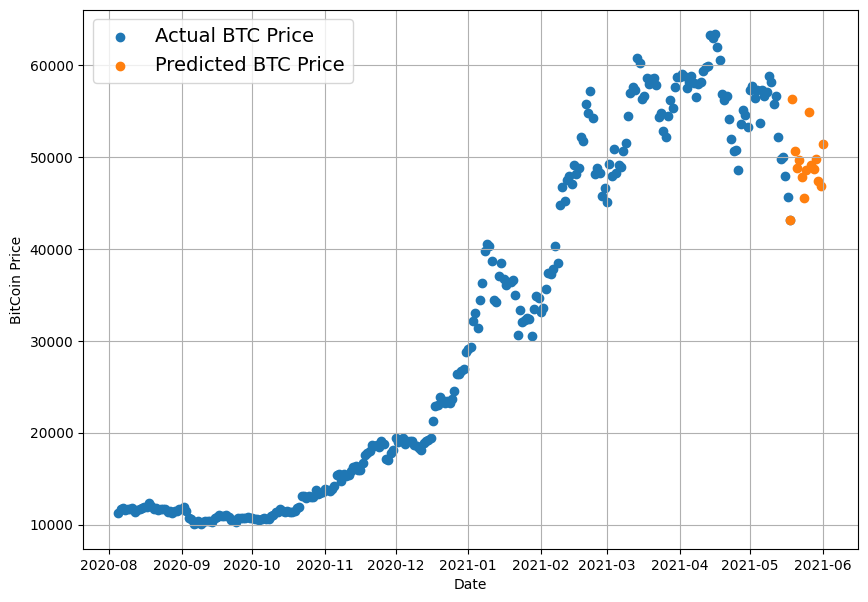

In [ ]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the Turkey Problem)

In [ ]:
# Let's introduce a turkey problem to our BTC data (price of BTC falls 100x in a day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacture an extra price on the end (to show case our turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

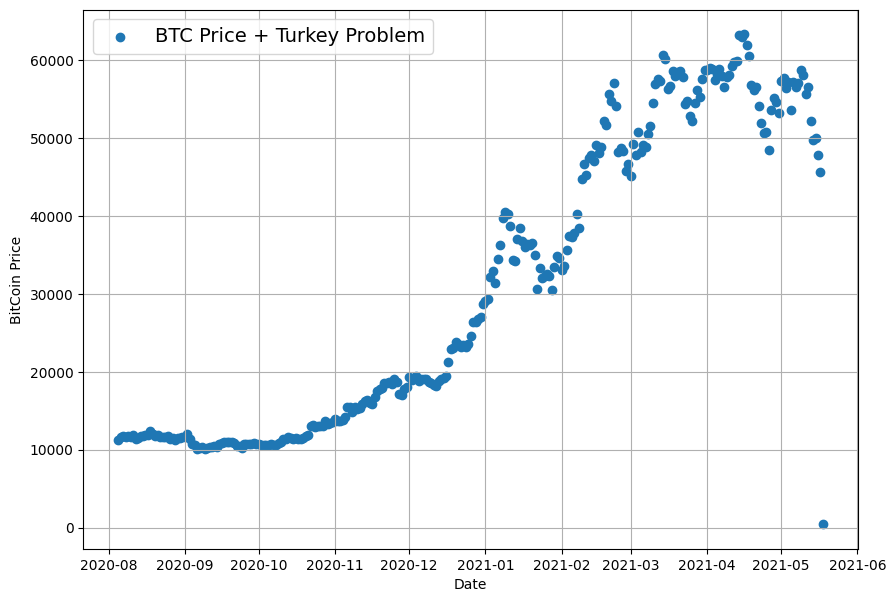

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                values=btc_price_turkey,
                format='-',
                label='BTC Price + Turkey Problem',
                start=2500)

In [ ]:
# Set the window and horizon
WINDOW_SIZE = 7
HORIZON = 1

In [ ]:
# Create train an test set split
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)


In [ ]:
# Create the model same as model 1

model_10 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=HORIZON)
], name="model_10")

# Compile the model
model_10.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="mae")

# Fit the model
history_model_10 = model_10.fit(X_train,
                                y_train,
                                epochs=100,
                                validation_data=(X_test, y_test),
                                callbacks=[create_model_checkpoint(model_10.name)])

Epoch 1/100
66/70 [===========================>..] - ETA: 0s - loss: 517.6221 - mae: 517.6221

70/70 [==============================] - 2s 16ms/step - loss: 500.6632 - mae: 500.6632 - val_loss: 991.1415 - val_mae: 991.1415
Epoch 2/100
67/70 [===========================>..] - ETA: 0s - loss: 154.8052 - mae: 154.8052

70/70 [==============================] - 1s 14ms/step - loss: 154.3274 - mae: 154.3274 - val_loss: 878.2054 - val_mae: 878.2054
Epoch 3/100
48/70 [===================>..........] - ETA: 0s - loss: 129.9797 - mae: 129.9797

70/70 [==============================] - 1s 14ms/step - loss: 135.7941 - mae: 135.7941 - val_loss: 776.8662 - val_mae: 776.8662
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 138.8580 - mae: 138.8580 - val_loss: 832.4800 - val_mae: 832.4800
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 126.9290 - mae: 126.9290 - val_loss: 781.2655 - val_mae: 781.2655
Epoch 6/100
68/70 [============================>.] - ETA: 0s - loss: 126.6194 - mae: 126.6194

70/70 [==============================] - 1s 14ms/step - loss: 128.3153 - mae: 128.3153 - val_loss: 749.0517 - val_mae: 749.0517
Epoch 7/100
63/70 [==========================>...] - ETA: 0s - loss: 124.0435 - mae: 124.0435

70/70 [==============================] - 1s 14ms/step - loss: 124.1511 - mae: 124.1511 - val_loss: 700.1414 - val_mae: 700.1414
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 116.6922 - mae: 116.6922 - val_loss: 852.5740 - val_mae: 852.5740
Epoch 9/100
66/70 [===========================>..] - ETA: 0s - loss: 112.0903 - mae: 112.0903

70/70 [==============================] - 1s 13ms/step - loss: 113.8524 - mae: 113.8524 - val_loss: 651.7227 - val_mae: 651.7227
Epoch 10/100
70/70 [==============================] - 0s 4ms/step - loss: 118.5803 - mae: 118.5803 - val_loss: 810.4230 - val_mae: 810.4230
Epoch 11/100
70/70 [==============================] - 0s 4ms/step - loss: 117.2208 - mae: 117.2208 - val_loss: 840.1442 - val_mae: 840.1442
Epoch 12/100
70/70 [==============================] - 0s 4ms/step - loss: 112.9732 - mae: 112.9732 - val_loss: 687.1888 - val_mae: 687.1888
Epoch 13/100
70/70 [==============================] - 0s 3ms/step - loss: 121.5888 - mae: 121.5888 - val_loss: 670.2296 - val_mae: 670.2296
Epoch 14/100
70/70 [==============================] - 0s 4ms/step - loss: 137.5941 - mae: 137.5941 - val_loss: 652.4077 - val_mae: 652.4077
Epoch 15/100
70/70 [==============================] - 0s 3ms/step - loss: 129.4831 - mae: 129.4831 - val_loss: 653.1216 - val_mae: 653.1216
Epoch 16/100
70/70 [============

70/70 [==============================] - 1s 18ms/step - loss: 118.6088 - mae: 118.6088 - val_loss: 646.9113 - val_mae: 646.9113
Epoch 27/100
70/70 [==============================] - 0s 3ms/step - loss: 118.1500 - mae: 118.1500 - val_loss: 716.5364 - val_mae: 716.5364
Epoch 28/100
69/70 [============================>.] - ETA: 0s - loss: 114.4496 - mae: 114.4496

70/70 [==============================] - 1s 13ms/step - loss: 114.7439 - mae: 114.7439 - val_loss: 643.2967 - val_mae: 643.2967
Epoch 29/100
70/70 [==============================] - 0s 3ms/step - loss: 113.7462 - mae: 113.7462 - val_loss: 692.6390 - val_mae: 692.6390
Epoch 30/100
70/70 [==============================] - 0s 4ms/step - loss: 115.8553 - mae: 115.8553 - val_loss: 661.0090 - val_mae: 661.0090
Epoch 31/100
70/70 [==============================] - 0s 3ms/step - loss: 115.5481 - mae: 115.5481 - val_loss: 806.9790 - val_mae: 806.9790
Epoch 32/100
70/70 [==============================] - 0s 4ms/step - loss: 125.7458 - mae: 125.7458 - val_loss: 775.7153 - val_mae: 775.7153
Epoch 33/100
70/70 [==============================] - 0s 3ms/step - loss: 111.9015 - mae: 111.9015 - val_loss: 745.1053 - val_mae: 745.1053
Epoch 34/100
70/70 [==============================] - 0s 4ms/step - loss: 120.7352 - mae: 120.7352 - val_loss: 811.1382 - val_mae: 811.1382
Epoch 35/100
70/70 [============

70/70 [==============================] - 1s 14ms/step - loss: 116.1487 - mae: 116.1487 - val_loss: 643.1818 - val_mae: 643.1818
Epoch 43/100
70/70 [==============================] - 0s 4ms/step - loss: 111.9506 - mae: 111.9506 - val_loss: 728.6241 - val_mae: 728.6241
Epoch 44/100
70/70 [==============================] - 0s 4ms/step - loss: 117.5873 - mae: 117.5873 - val_loss: 689.5856 - val_mae: 689.5856
Epoch 45/100
70/70 [==============================] - 0s 3ms/step - loss: 114.9802 - mae: 114.9802 - val_loss: 645.7941 - val_mae: 645.7941
Epoch 46/100
70/70 [==============================] - 0s 4ms/step - loss: 113.5106 - mae: 113.5106 - val_loss: 713.4597 - val_mae: 713.4597
Epoch 47/100
70/70 [==============================] - 0s 3ms/step - loss: 113.4696 - mae: 113.4696 - val_loss: 681.2841 - val_mae: 681.2841
Epoch 48/100
70/70 [==============================] - 0s 3ms/step - loss: 111.2221 - mae: 111.2221 - val_loss: 728.3533 - val_mae: 728.3533
Epoch 49/100
70/70 [============

70/70 [==============================] - 1s 19ms/step - loss: 109.8637 - mae: 109.8637 - val_loss: 642.9496 - val_mae: 642.9496
Epoch 61/100
70/70 [==============================] - 0s 5ms/step - loss: 121.1565 - mae: 121.1565 - val_loss: 654.2891 - val_mae: 654.2891
Epoch 62/100
70/70 [==============================] - 0s 5ms/step - loss: 113.2256 - mae: 113.2256 - val_loss: 743.6605 - val_mae: 743.6605
Epoch 63/100
70/70 [==============================] - 0s 5ms/step - loss: 118.8347 - mae: 118.8347 - val_loss: 883.3903 - val_mae: 883.3903
Epoch 64/100
70/70 [==============================] - 0s 5ms/step - loss: 116.4724 - mae: 116.4724 - val_loss: 772.5989 - val_mae: 772.5989
Epoch 65/100
70/70 [==============================] - 0s 4ms/step - loss: 109.9323 - mae: 109.9323 - val_loss: 753.6376 - val_mae: 753.6376
Epoch 66/100
70/70 [==============================] - 0s 4ms/step - loss: 110.4196 - mae: 110.4196 - val_loss: 664.5524 - val_mae: 664.5524
Epoch 67/100
70/70 [============

70/70 [==============================] - 2s 31ms/step - loss: 113.5740 - mae: 113.5740 - val_loss: 641.8922 - val_mae: 641.8922
Epoch 77/100
70/70 [==============================] - 0s 4ms/step - loss: 115.9532 - mae: 115.9532 - val_loss: 812.6207 - val_mae: 812.6207
Epoch 78/100
70/70 [==============================] - 0s 4ms/step - loss: 115.5560 - mae: 115.5560 - val_loss: 647.8801 - val_mae: 647.8801
Epoch 79/100
70/70 [==============================] - 0s 4ms/step - loss: 112.5376 - mae: 112.5376 - val_loss: 784.0714 - val_mae: 784.0714
Epoch 80/100
70/70 [==============================] - 0s 3ms/step - loss: 116.5705 - mae: 116.5705 - val_loss: 757.0609 - val_mae: 757.0609
Epoch 81/100
70/70 [==============================] - 0s 3ms/step - loss: 106.8045 - mae: 106.8045 - val_loss: 648.4073 - val_mae: 648.4073
Epoch 82/100
70/70 [==============================] - 0s 3ms/step - loss: 108.5720 - mae: 108.5720 - val_loss: 648.0810 - val_mae: 648.0810
Epoch 83/100
70/70 [============

In [ ]:
# Evaluate the model
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 647.3512 - mae: 647.3512


[647.3511962890625, 647.3511962890625]

In [ ]:
# Load the best performing model
turkey_model = tf.keras.models.load_model("model_experiments/model_10")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 641.8922 - mae: 641.8922


[641.8922119140625, 641.8922119140625]

In [ ]:
# Make prediction with turkey problem
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[-10:]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([57147.38 , 58882.383, 58293.367, 56253.074, 56458.92 , 52601.758,
       49943.305, 49987.105, 48606.355, 45987.332], dtype=float32)>

In [ ]:
# Evaluate the turkey preds
turkey_results = evaluate_preds(y_test, turkey_preds)
turkey_results

{'mae': 17148.352,
 'mse': 615780800.0,
 'rmse': 23750.875,
 'mape': 121.62639,
 'mase': 26.537128}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

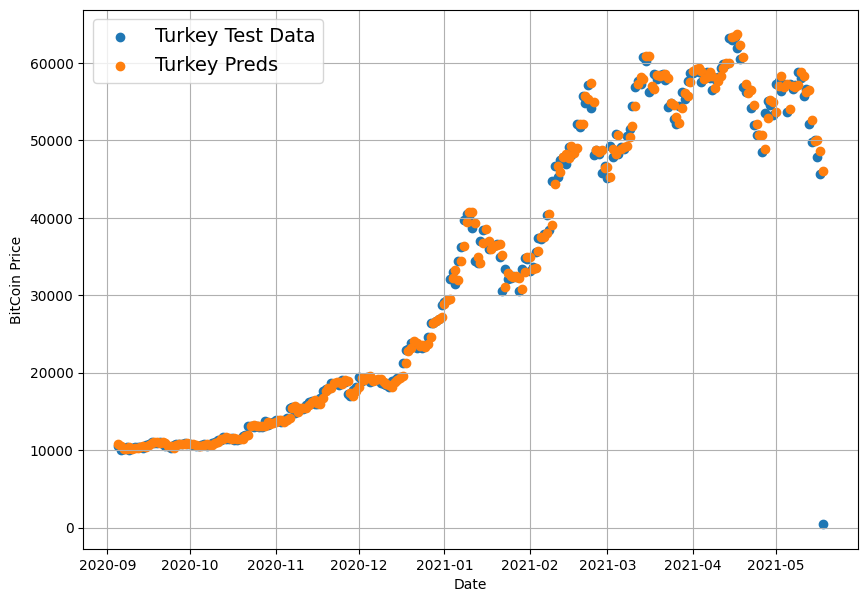

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                values=btc_price_turkey[-len(y_test):],
                format='-',
                label='Turkey Test Data',
                start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                values=turkey_preds,
                format='-',
                label='Turkey Preds',
                start=offset)

# Compare model results

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,566.504333,1.158366e+06,1076.274170,2.534148,0.995191
model_2_dense_w30_h1,614.212646,1.303586e+06,1141.746948,2.814192,1.073650
model_3_dense_w30_h7,1214.973389,5.109829e+06,1401.648682,5.561000,2.161977
model_4_CONV1D,564.384338,1.148959e+06,1071.895142,2.525288,0.991467
model_5_LSTM,567.866882,1.162641e+06,1078.258301,2.550892,0.997585
model_6_multivariate,571.025452,1.162616e+06,1078.246704,2.589755,1.003134
model_8_NBEATs,585.451355,1.204558e+06,1097.523438,2.657467,1.028476
model_9_ensemble,567.621521,1.139083e+06,1067.278198,2.572959,0.997154
model_10_turkey,17148.351562,6.157808e+08,23750.875000,121.626389,26.537128


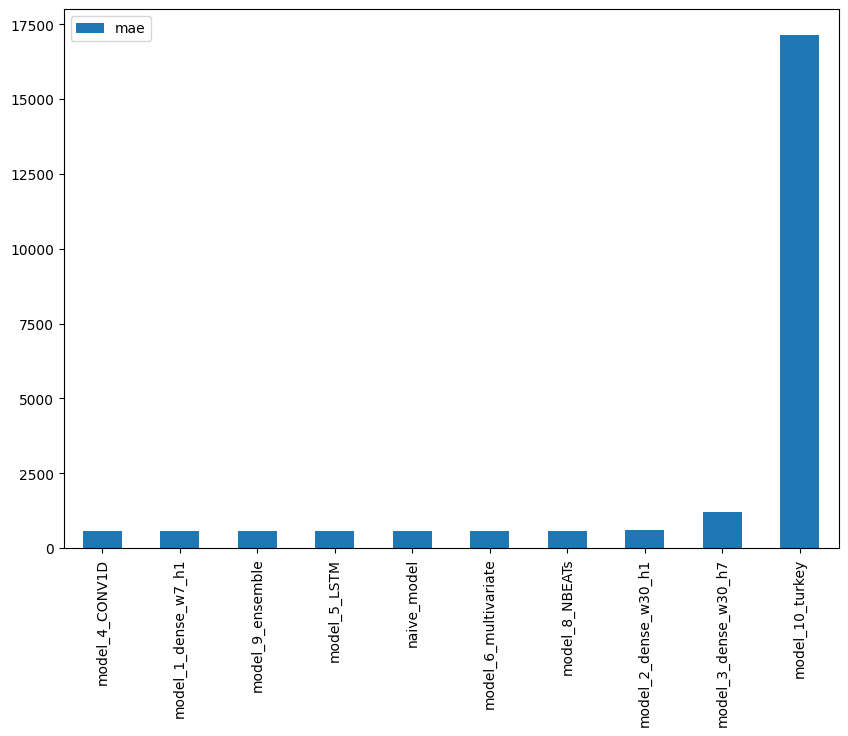

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");